# Description
## Objective
Statistical Analysis of Business Data. Explore the dataset and extract insights from the data. 
- Explore the dataset and extract insights using Exploratory Data Analysis.
- Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint- Formulate a hypothesis and prove/disprove it]
- Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
- Is the proportion of smokers significantly different across different regions? [Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency()]
- Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.
*Consider a significance level of 0.05 for all tests.

### Context - 
Leveraging customer information is of paramount importance for most businesses. 
In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. 

## Data Dictionary –

* Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
* Sex - This is the policy holder's gender, either male or female.
* BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
* Children - This is an integer indicating the number of children / dependents covered by the insurance plan.
* Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
* Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
* Charges​ - Individual medical costs billed to health insurance

### Import the necessary packages

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from scipy.stats import chi2_contingency   # For Chi-Sq 

### Read the dataset

In [2]:
AI_data = pd.read_csv("/Users/srujana/Downloads/AxisInsurance.csv")

In [3]:
# copying data to another varaible to avoid any changes to original data
AxisInsurance_data = AI_data.copy()

## Verify if the data is loaded properly

In [4]:
AxisInsurance_data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

## View the shape of the dataset

In [5]:
AxisInsurance_data.shape

(1338, 7)

* Dataset has 1338 rows and 7 columns.

## Count the datatypes

In [6]:
#count the number of variables in each datatype
AxisInsurance_data.dtypes.value_counts()

object     3
float64    2
int64      2
dtype: int64

## Check the columns

In [7]:
#View the column names
AxisInsurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Check the data types of the columns for the dataset.

In [8]:
AxisInsurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Observations:
All the columns are either of type object, int64 or float64.

Age and children columns are of integer data type.

Sex, smoker and Region columns are of object datatype.we can change them to categories.
coverting "objects" to "category" reduces the data space required to store the dataframe.

Bmi and charges are of float64 datatype.

In [9]:
AxisInsurance_data["sex"]=AxisInsurance_data["sex"].astype("category")
AxisInsurance_data["smoker"]=AxisInsurance_data["smoker"].astype("category")
AxisInsurance_data["region"]=AxisInsurance_data["region"].astype("category")

### Convert the bmi variable into a categorical variable with 4 bins as mentioned below.
- 0 to 18.4 = "Underweight"
- 18.5 to 24.9 = "Normal Weight"
- 25 to 29.9 = "Overweight"
- 30 to 99="Obese"

Reference: About Adult BMI. (2020, September). Center for Disease Control. https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html#InterpretedAdults

In [10]:
#convert bmi variable into categorical BMI range group column with 4 bins and add it next to the bmi variable. 
category = pd.cut(AxisInsurance_data.bmi,bins=[0,18.4,24.9,29.9,99],labels=['Underweight','Normal Weight','Overweight','Obese'])
AxisInsurance_data.insert(3,'BMI_group',category)

In [11]:
AxisInsurance_data.head()

age     sex     bmi      BMI_group  children smoker     region      charges
0   19  female  27.900     Overweight         0    yes  southwest  16884.92400
1   18    male  33.770          Obese         1     no  southeast   1725.55230
2   28    male  33.000          Obese         3     no  southeast   4449.46200
3   33    male  22.705  Normal Weight         0     no  northwest  21984.47061
4   32    male  28.880     Overweight         0     no  northwest   3866.85520

### Lets verify if the datatypes issue is fixed

In [12]:
# Verify the dataset information
AxisInsurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        1338 non-null   int64   
 1   sex        1338 non-null   category
 2   bmi        1338 non-null   float64 
 3   BMI_group  1338 non-null   category
 4   children   1338 non-null   int64   
 5   smoker     1338 non-null   category
 6   region     1338 non-null   category
 7   charges    1338 non-null   float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 47.7 KB


### Give a statistical summary for the dataset.

In [13]:
AxisInsurance_data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

### Observations:
- The average age of customers is 39.2 while the median is 39.0years and it appears to be a normal distribution from the values.
- The variable age ranges from 18years to 64 years.
- The mean of bmi varable is 30 and the median is 30.4 while the values range from 15.96 to 53.13.It appears to be normal distribution from the values as mean and median values are same.
- There are less than 25% of the customers falling in the ideal bmi range(18.5 to 24.9).
- The mean value of charges is 13270 and the median value is 9382, while the variable values range from 1121 to 63770.
- Charges variable appears to be right skewed.

In [14]:
AxisInsurance_data.describe(include=["category"])

sex BMI_group smoker     region
count   1338      1338   1338       1338
unique     2         4      2          4
top     male     Obese     no  southeast
freq     676       716   1064        364

### Observations:
- Majority of the customers who are obese.
- There are more non smokers than smokers.
- There are 4 different regions and there are more customers from south east region

### Check for missing values

In [15]:
AxisInsurance_data.isnull().sum()
#pd.DataFrame(AxisInsurance_data.isnull().sum(),columns=['Number of missing values'])

age          0
sex          0
bmi          0
BMI_group    0
children     0
smoker       0
region       0
charges      0
dtype: int64

Observation:There are no null values in the dataset

### Verify if there are any duplicates

In [16]:
# Verifying the number of duplicate records
sum(AxisInsurance_data.duplicated())

1

In [17]:
# Dropping the duplicate record
AxisInsurance_data=AxisInsurance_data.drop_duplicates()

In [18]:
# Verifying the number of duplicate records
sum(AxisInsurance_data.duplicated())

0

In [19]:
AxisInsurance_data.shape

(1337, 8)

# Exploratory Data Analysis

## Univariate Analysis

###  View the distribution of the variables

## Observe  Age Variable distribution

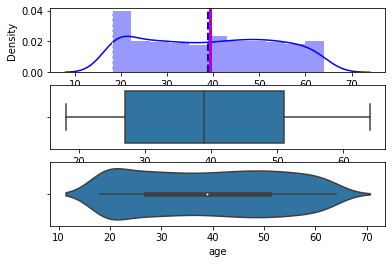

In [20]:
#View the distribution of the Age variable
plt.subplot(3,1,1)
sns.distplot(AxisInsurance_data.age,color="blue");
plt.axvline(AxisInsurance_data["age"].mean(),color='m',linewidth=3)# draw a line indicating mean
plt.axvline(AxisInsurance_data["age"].median(),color='b',linestyle='dashed',linewidth=2)# draw a line indicating median
plt.axvline(AxisInsurance_data["age"].mode()[0],color='w',linestyle='dashed',linewidth=1)# draw a line indicating mode
plt.subplot(3,1,2)
sns.boxplot(AxisInsurance_data.age);
plt.subplot(3,1,3)
sns.violinplot(AxisInsurance_data.age);

### Observations:
* Age variable ranges from 18-64 years and appears to be bimodal.
* The mean and median value of age is 39years.
* The Lower or first quartile value is 27years, indicating that 25% of the customers are aged between 18-27years.
* The upper or  third quartile is at 51 years, indicating that there are 75% of the customers are below 51 years and  the rest 25% of the customers are above 51 years.

## BMI Variable Distribution

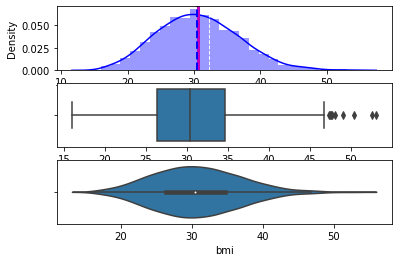

In [21]:
#View the distribution of the bmi variable
plt.subplot(3,1,1)
sns.distplot(AxisInsurance_data.bmi,color="blue");
plt.axvline(AxisInsurance_data["bmi"].mean(),color='m',linewidth=3)# draw a line indicating mean
plt.axvline(AxisInsurance_data["bmi"].median(),color='b',linestyle='dashed',linewidth=2)# draw a line indicating median
plt.axvline(AxisInsurance_data["bmi"].mode()[0],color='w',linestyle='dashed',linewidth=1)# draw a line indicating mode
plt.subplot(3,1,2)
sns.boxplot(AxisInsurance_data.bmi);
plt.subplot(3,1,3)
sns.violinplot(AxisInsurance_data.bmi);

Observations:
* BMI variable appears to be be slightly right skewed but can be considered to be normally distributed with the values ranging from 15.96 and 51.13.
* The mean and median values are comparable (30.7~30.4), and are higher than the ideal BMI range(18.5 to 24.9).
* The Lower or first quartile value is 26.29 which indicates that more than 75% of the customers' bmi values are above the ideal BMI range.
* The upper or  third quartile is at 34.69.
* There are some outliers on the right side.

## Charges Variable Distribution

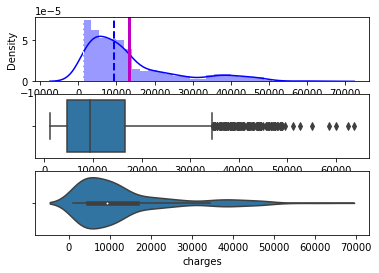

In [22]:
#View the distribution of the Age variable
plt.subplot(3,1,1)
sns.distplot(AxisInsurance_data.charges,color="blue");
plt.axvline(AxisInsurance_data["charges"].mean(),color='m',linewidth=3)# draw a line indicating mean
plt.axvline(AxisInsurance_data["charges"].median(),color='b',linestyle='dashed',linewidth=2)# draw a line indicating median
plt.axvline(AxisInsurance_data["charges"].mode()[0],color='w',linestyle='dashed',linewidth=1)# draw a line indicating mode
plt.subplot(3,1,2)
sns.boxplot(AxisInsurance_data.charges);
plt.subplot(3,1,3)
sns.violinplot(AxisInsurance_data.charges);

Observations:
* Charges variable is highly right skewed with the values ranging from 1121 to 63770.
* The mean value is 13270 and median value is 9382 
* The Lower or first quartile value is 4740.
* The upper or  third quartile is at 16639.
* There are some outliers on the right.

### View the plots for categorical variables

In [23]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

## Observe gender variable

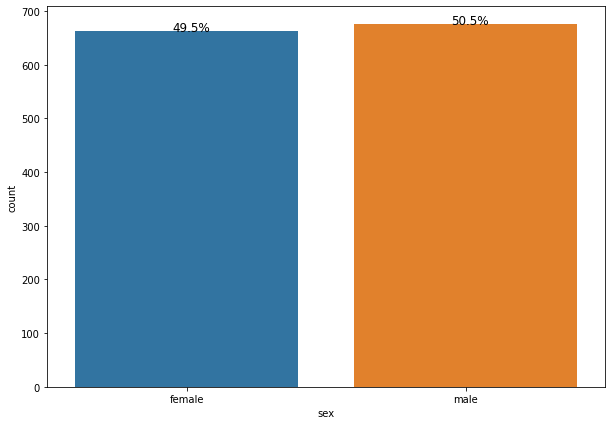

In [24]:
#View the countplot on gender 
plt.figure(figsize=(10,7))
ax = sns.countplot(AxisInsurance_data['sex'])
bar_perc(ax,AxisInsurance_data['sex'])

### Observations:
- There are slightly more male customers than female(Male-676,Female-662).
    
    

## Observe BMI_Group Variable

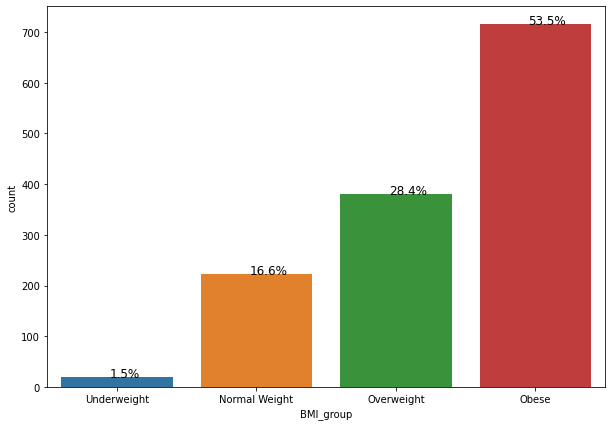

In [25]:
#View the countplot on BMI_group 
plt.figure(figsize=(10,7))
ax = sns.countplot(AxisInsurance_data['BMI_group'])
bar_perc(ax,AxisInsurance_data['BMI_group'])

### Observations:
The categorization has been based on CDC website
Reference: About Adult BMI. (2020, September). Center for Disease Control. https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html#InterpretedAdults

- Majority of the customers are obese, followed by over weight.
- There are only 16.6% of the customers who are in ideal range of bmi values.


## Observe children variable

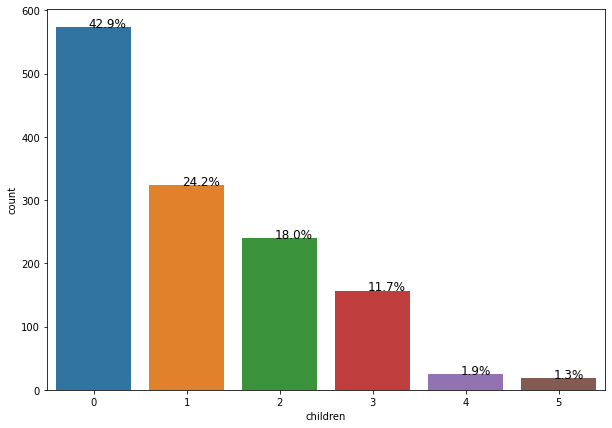

In [26]:
#View the countplot on children 
plt.figure(figsize=(10,7))
ax = sns.countplot(AxisInsurance_data['children'])
bar_perc(ax,AxisInsurance_data['children'])

### Observations:
- There are more customers with no children, followed by customers with 1 kid , 2 kids, 3 kids ,4 kids and 5 kids.
- There are very few customers with 4 kids(1.9%) and 5 kids(1.3%).

## Observe smoker variable

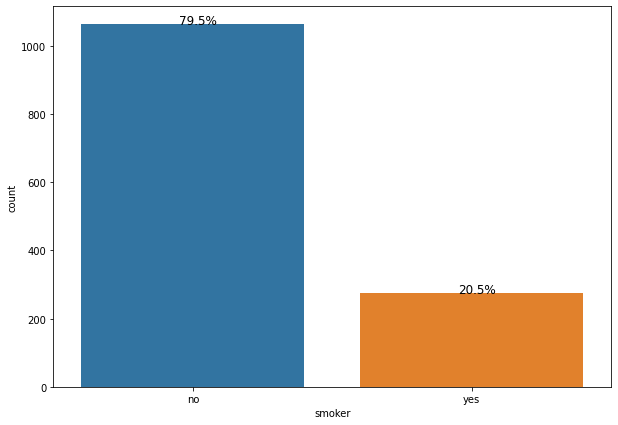

In [27]:
#View the countplot on smoker 
plt.figure(figsize=(10,7))
ax = sns.countplot(AxisInsurance_data['smoker'])
bar_perc(ax,AxisInsurance_data['smoker'])

### Observations:
- There are considerably higher nonsmokers (79.5%) than smokers(20.5%).

## Observe region variable

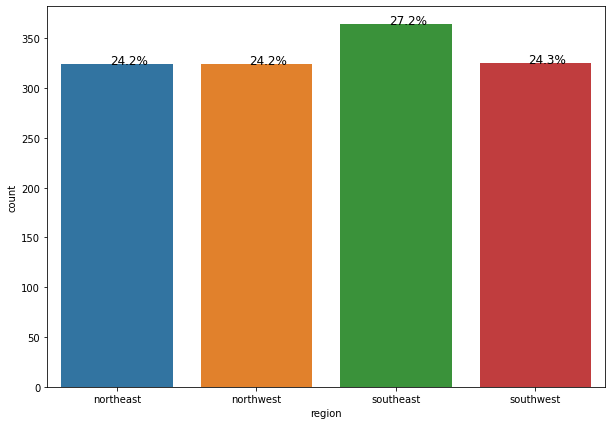

In [28]:
#View the countplot on region 
plt.figure(figsize=(10,7))
ax = sns.countplot(AxisInsurance_data['region'])
bar_perc(ax,AxisInsurance_data['region'])

### Observations:
- There are more customers in the southeast region compared to other regions.
- The percentage of customers in other regions are comparable.

# Bivariate Analysis
Plot bivariate charts between variables to understand their interaction with each other.

## Corrrelation

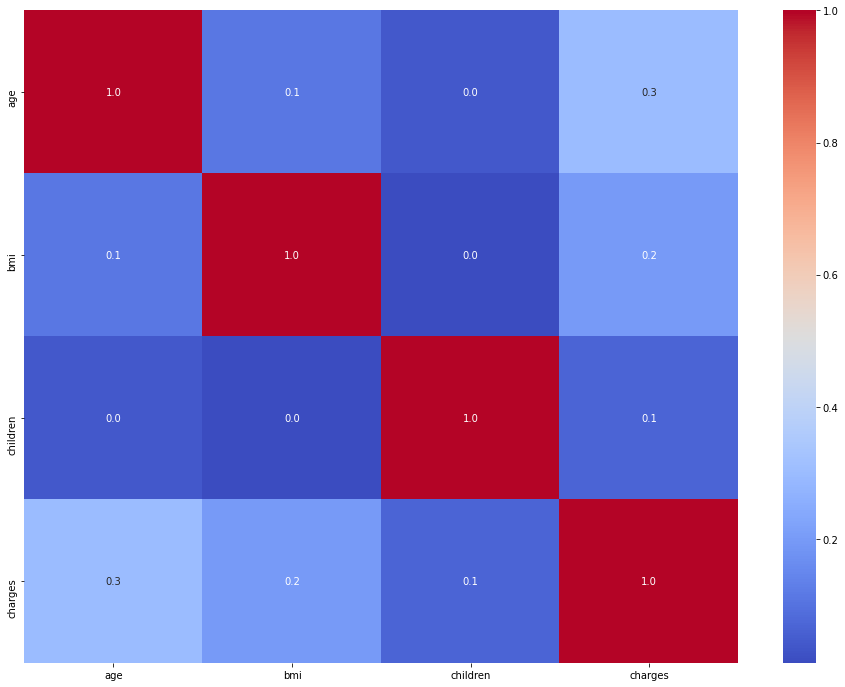

In [29]:
corr=AxisInsurance_data.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

### Observations:
- There is no significant correlation between the variables.
- Age has a positive but moderate correlation with charges and a weak positive correlation with bmi.
- BMI has a weak positive correlation with charges and age.
- Children has very weak positive correlation with charges.

## Bivariate Scatter Plots

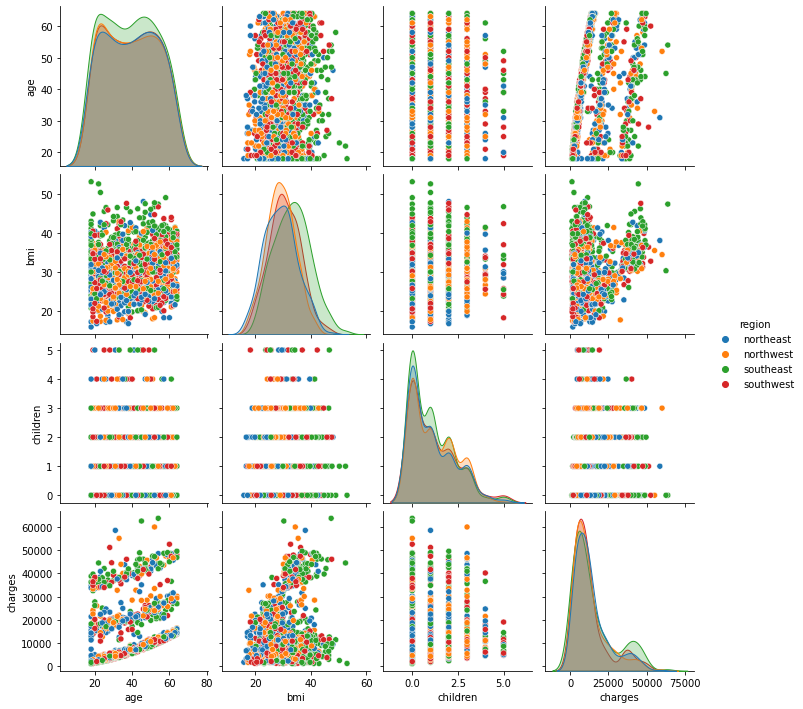

In [30]:
sns.pairplot(data=AxisInsurance_data,hue="region")
plt.show()

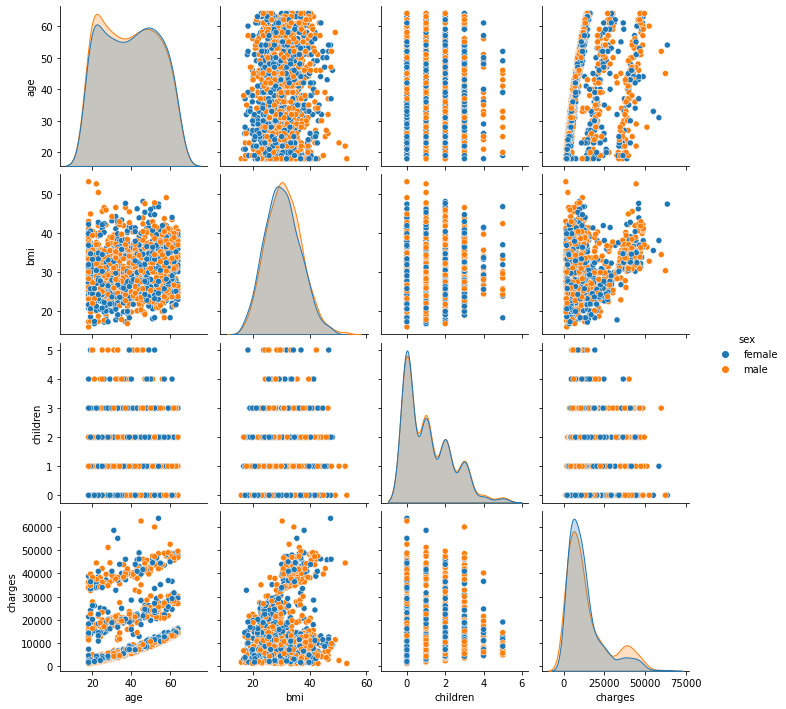

In [31]:
sns.pairplot(data=AxisInsurance_data,hue="sex")
plt.show()

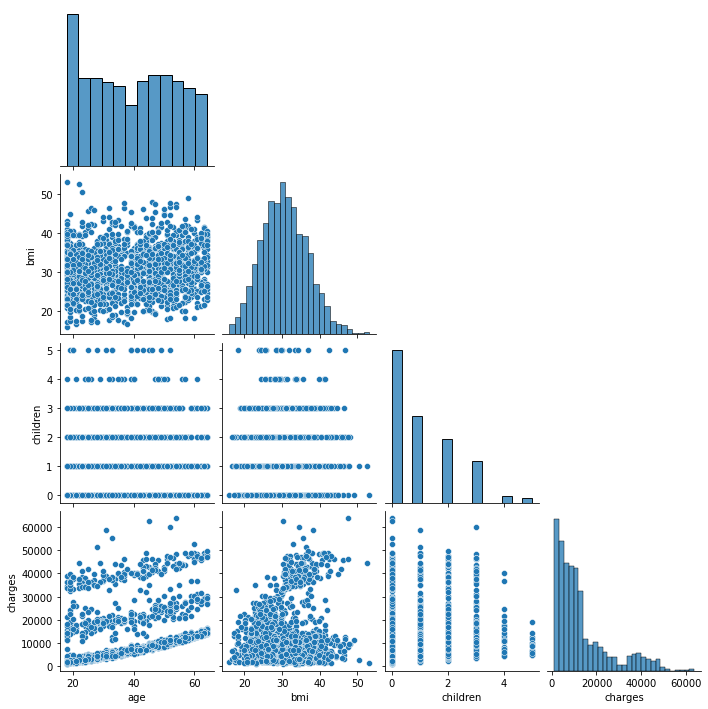

In [32]:
#View the Pairplot for all the numerical columns in the dataset
sns.pairplot(AxisInsurance_data, corner=True);

## BMI_group vs Age

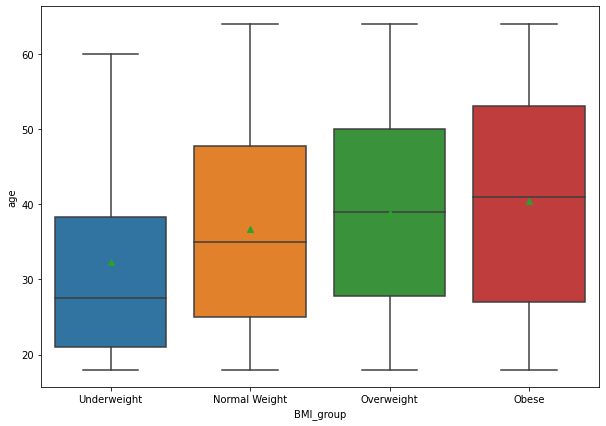

In [33]:
#Relationship between Age and BMI
plt.figure(figsize=(10,7))
sns.boxplot(AxisInsurance_data["BMI_group"],AxisInsurance_data["age"],showmeans="true");
plt.show()

In [34]:
AxisInsurance_data.groupby(["BMI_group"])['age'].median()

BMI_group
Underweight      27.5
Normal Weight    35.0
Overweight       39.0
Obese            41.0
Name: age, dtype: float64

### Observations:
- The median age value of obese customers is higher than the other bmi group customers.
- The underweight customers age ranges from 18-60 and the median value is 27.5 years.
- The normal weight customers age range from 18-64 years and the median value is 35 years.
- The median value of age for overweight and obese customers are 39 and 41 years respectively.

## Age vs BMI

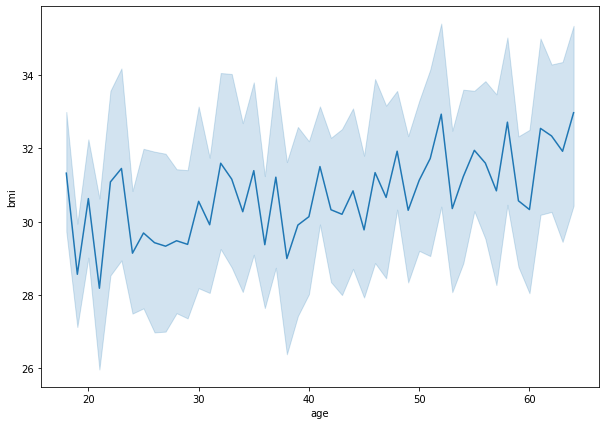

In [35]:
#Relationship between Age and BMI
plt.figure(figsize=(10,7))
sns.lineplot(AxisInsurance_data["age"],AxisInsurance_data["bmi"]);
plt.show()

### Observations:
- As already observed in the heatmap, the bmi variable seems to increase with age.

## Age vs Smoker

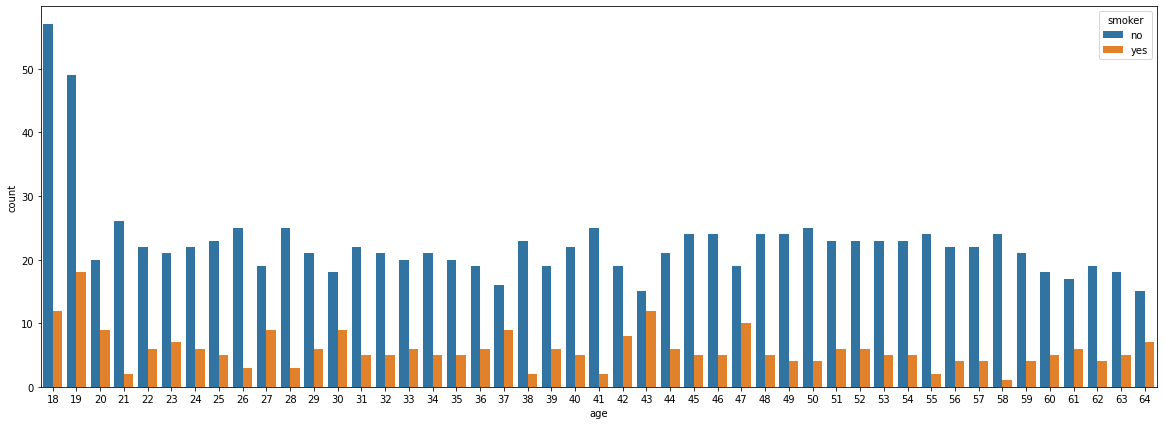

In [36]:
#Relationship between Smoker and Age
plt.figure(figsize=(20,7))
sns.countplot(AxisInsurance_data["age"],hue=AxisInsurance_data["smoker"]);

### Observations:
- There are more 18yr and 19yr old customers and majority of them are non smokers.
- There are highest number of smokers at 19yrs compared to other ages.
- There are more smokers in the ages 19yrs, 18yrs  and 43yrs compared to other ages.
- The ratio of smokers to non smokers is highest for 43yrs old, followed by 37 and 47yrs.

## Age vs Region

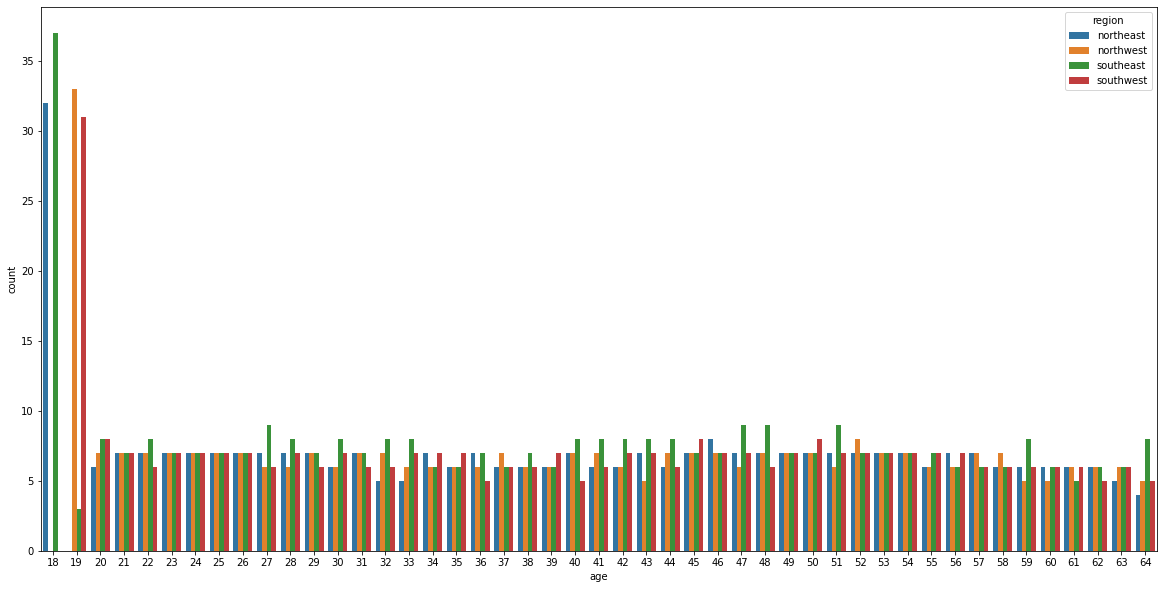

In [37]:
#Relationship between Smoker and Age
plt.figure(figsize=(20,10))
sns.countplot(AxisInsurance_data["age"],hue=AxisInsurance_data["region"]);

### Observations:
- All the 18yr old customers are from either north east or south east regions only.
- The mojaority of the 19yr old customers are from north west and south west regions.
- We can also notice that majority of the customers live in south east region, as indicated by the green spikes.

## Smoker vs Region

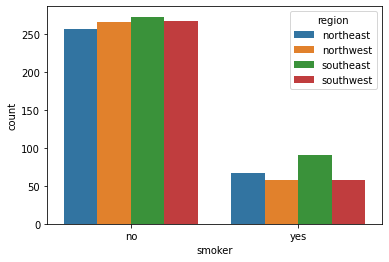

In [38]:
#Relationship between smoker and region
sns.countplot(AxisInsurance_data["smoker"],hue=AxisInsurance_data["region"]);

### Observations:
- Majority of the customers are non smokers.
- The customers from south east region are slightly higher compared to other regions.
- There are more smokers from south east region, followed by north east region and the rest.
- There are equal number of customers from north west and south west regions.

## Age vs Gender 

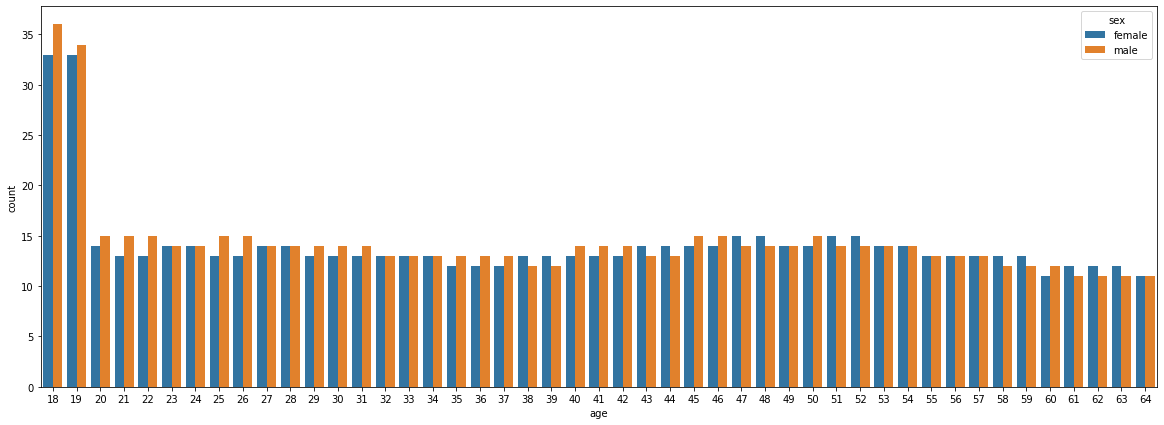

In [39]:
#Relationship between sex and age
plt.figure(figsize=(20,7))
sns.countplot(AxisInsurance_data["age"],hue=AxisInsurance_data["sex"]);

### Observations:
- There are more customers from the ages 18 and 19 years. 
- In general, there are slightly more male customers than female.

## Gender vs BMI

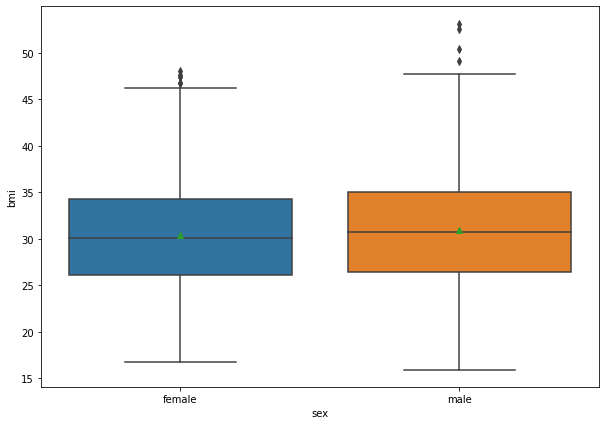

In [40]:
#Relationship between Sex and BMI
plt.figure(figsize=(10,7))
sns.boxplot(AxisInsurance_data["sex"],AxisInsurance_data["bmi"],showmeans="true");

### Observations:
There is not much significant difference between male bmi and female bmi.

## Gender vs BMI_group

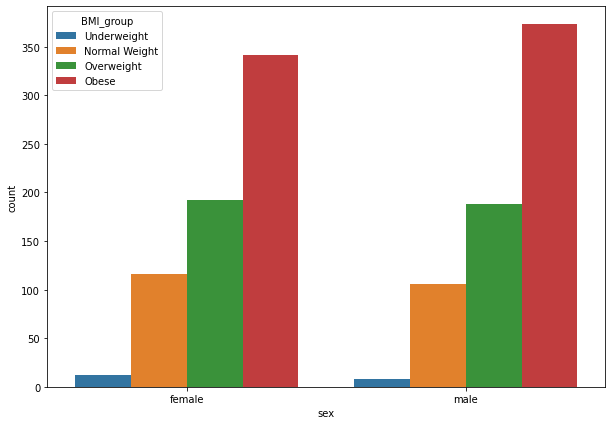

In [41]:
#Relationship between Sex and BMI group
plt.figure(figsize=(10,7))
sns.countplot(AxisInsurance_data["sex"],hue=AxisInsurance_data["BMI_group"]);

In [42]:
AxisInsurance_data.groupby(["sex"])['bmi'].median()

sex
female    30.1075
male      30.6900
Name: bmi, dtype: float64

### Observations:
- There are more customers who are obese followed by overweight,Normal weight and underweight.
- There are slightly more male obese customers than female obese customers.
- The rest of the bmi groups seems to be comparable for male and female.
- There are slightly more underweight female customers than male customers.

## Gender vs smoker

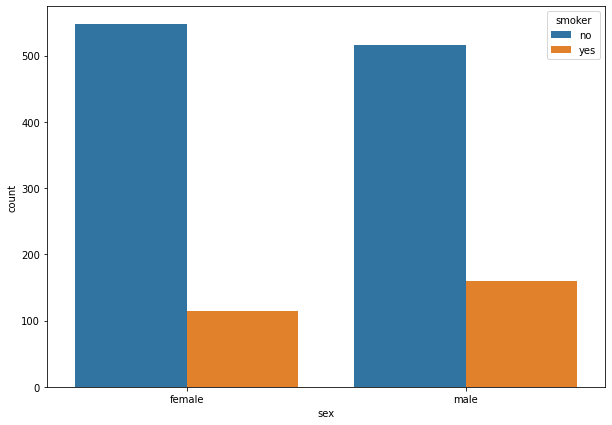

In [43]:
#Relationship between Sex and smoker
plt.figure(figsize=(10,7))
sns.countplot(AxisInsurance_data["sex"],hue=AxisInsurance_data["smoker"]);

### Observations:
- There are more male smokers compared to female smokers.

## Charges vs Gender

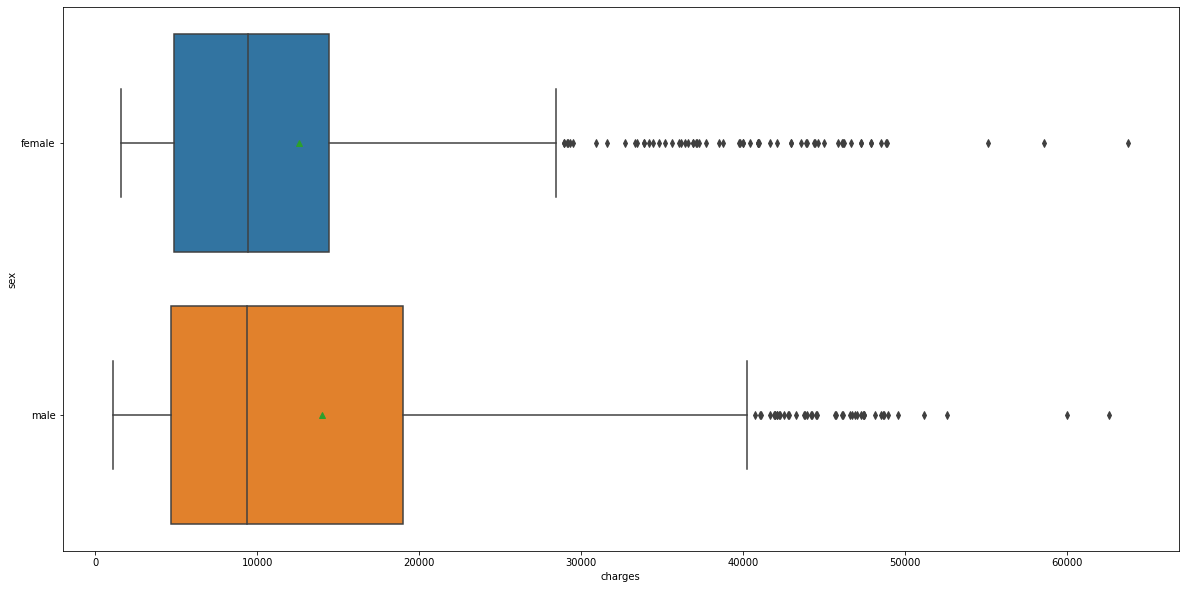

In [44]:
#Relationship between sex and charges
plt.figure(figsize=(20,10))
sns.boxplot(AxisInsurance_data["charges"],AxisInsurance_data["sex"],showmeans=True);

In [45]:
AxisInsurance_data.groupby(["sex"])['charges'].mean()

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

### Observations:
- The charges for male customers is higher than female customers. We observed from earlier graphs that there are more smokers and men with higher obesity than women. We will analyze if charges are higher for smokers and people with higher BMI in the later sections. 
- There are outliers for both male and female customer charges, a little more outliers for female customer charges.
- The median value of male and female customers charges is same (~ 9400).
- The mean value of male charges is higher than female charges.
- The first quantile and the median value is same for both male and female charges. 
- The upper or thrid quantile of male customer charges is very high compared to female customer charges(infact double).

## BMI vs Charges

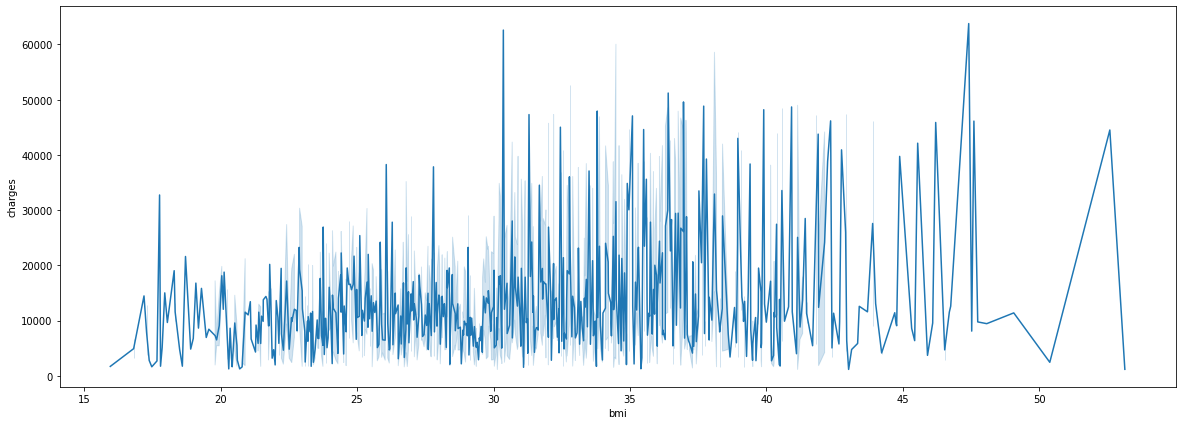

In [46]:
#Relationship between BMI and charges
plt.figure(figsize=(20,7))
sns.lineplot(AxisInsurance_data["bmi"],AxisInsurance_data["charges"]);

### Observations:
- The charges seems to increase with bmi.

## BMI_group vs Charges

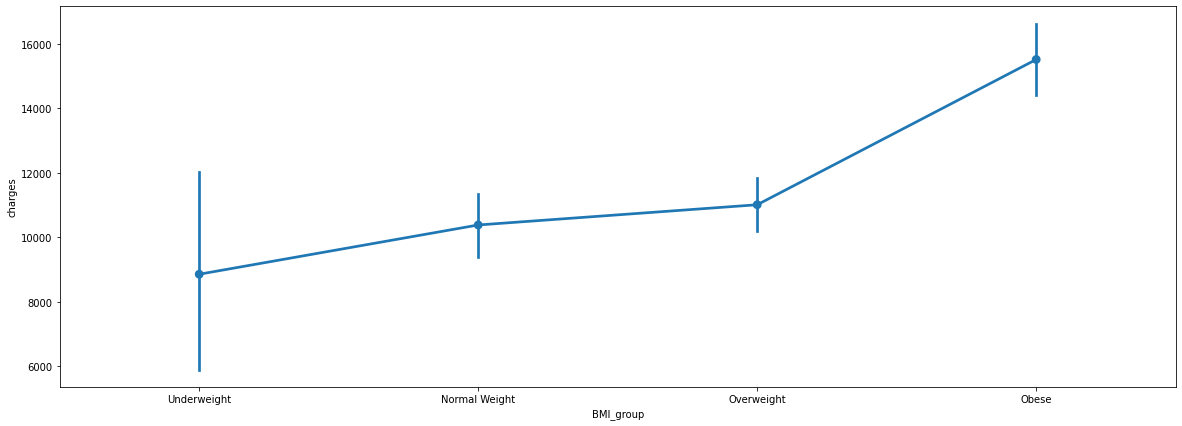

In [47]:
#Relationship between BMI and charges
plt.figure(figsize=(20,7))
sns.pointplot(AxisInsurance_data["BMI_group"],AxisInsurance_data["charges"]);

### Observations:
- The charges for customers with BMI under 24.5 is lesser compared to other groups.
- Customers with BMI > 30 have the highest insurance rates. 

## Age vs Charges

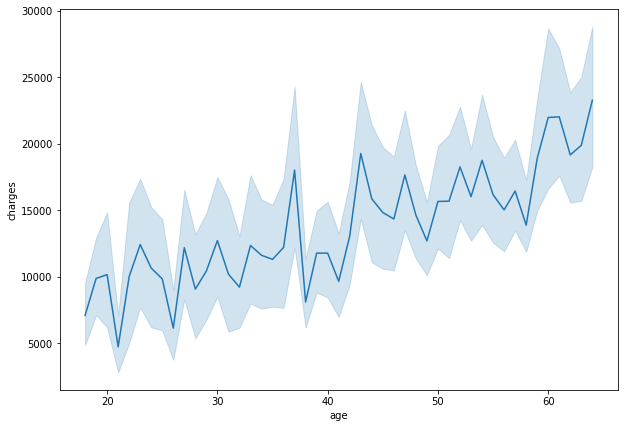

In [48]:
#Relationship between Age and Charges
plt.figure(figsize=(10,7))
sns.lineplot(AxisInsurance_data["age"],AxisInsurance_data["charges"]);

### Observations:
Intuitively, insurance charges will increase as age increases. This is on expected lines.

## BMI_group vs Smoker

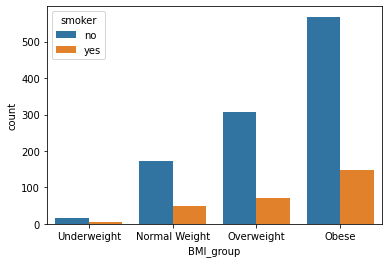

In [49]:
#Relationship between BMI and smoker
sns.countplot(AxisInsurance_data["BMI_group"],hue=AxisInsurance_data["smoker"]);

### Observations:
- There are less smokers compared to non smokers.
- There are more smokers in the obese group compared to other groups.

## Gender vs Region

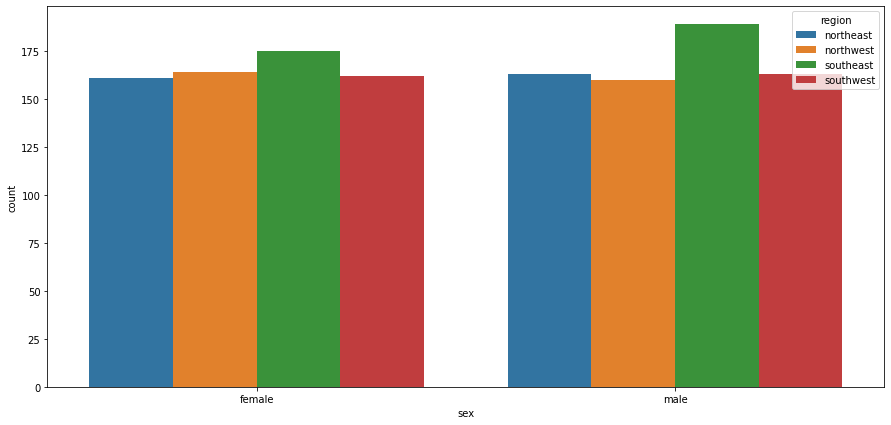

In [50]:
#Relationship between Sex and region
plt.figure(figsize=(15,7))
sns.countplot(AxisInsurance_data["sex"],hue=AxisInsurance_data["region"]);

### Observations:
- As already noticed, there are more customers from south east region.
- The majority of the customers from south east region are male.

## Gender vs Children

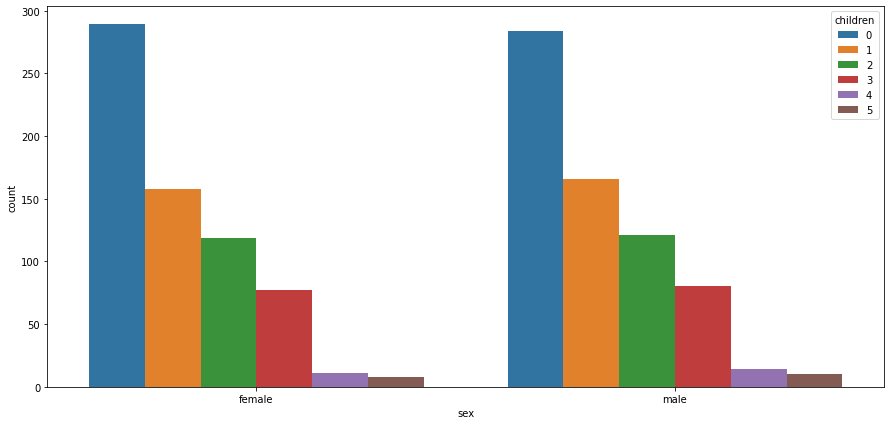

In [51]:
#Relationship between Sex and children
plt.figure(figsize=(15,7))
sns.countplot(AxisInsurance_data["sex"],hue=AxisInsurance_data["children"]);

### Observations:
Majority of the customers do not have children.

## Age vs Children

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '50'),
  Text(33, 0, '51'),
  Text(34, 0, '52'),
  Text(35, 0, '53'),
  Text(36, 0, '54'),
  Text(37, 0, '55')

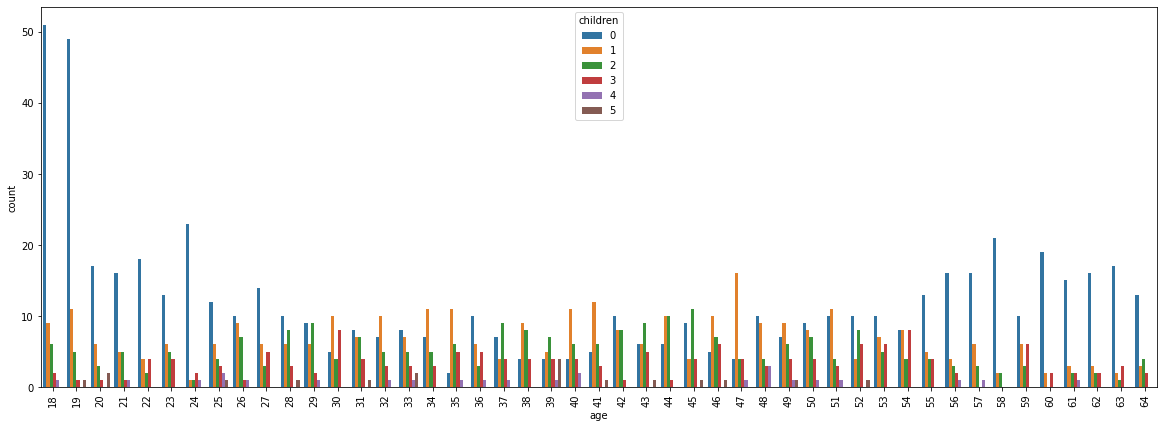

In [52]:
#Relationship between age and children
plt.figure(figsize=(20,7))
sns.countplot(AxisInsurance_data["age"],hue=AxisInsurance_data["children"]);
plt.xticks( rotation=90)

### Observations:
- Majority of the customers from the age groups 18-28 and 48-64 years, do not have children.
- And most of the customers from 30-51 years seems to have 1 kid.

## BMI_group vs Children

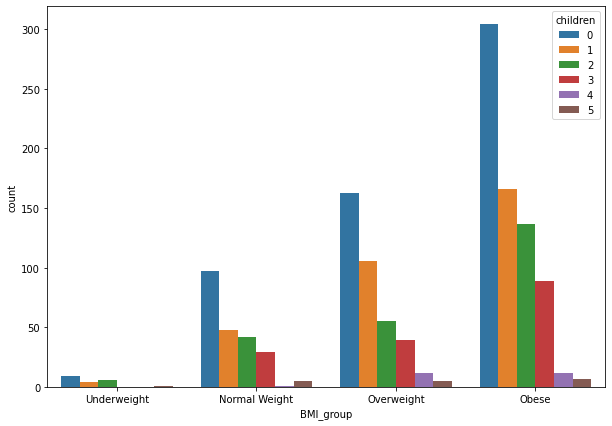

In [53]:
#Relationship between BMI and children
plt.figure(figsize=(10,7))
sns.countplot(AxisInsurance_data["BMI_group"],hue=AxisInsurance_data["children"]);

### Observations:
- There are very few customers with 4-5 kids, compared to other customers with 0-3 kids.
- Some of the customers with 0-3 and 5 kids fall in ideal BMI range, but only customer with 4 kids have ideal BMI range.
- There are more customers who fall beyond the ideal BMI range.
- There are more obese customers with no children.

## BMI vs children

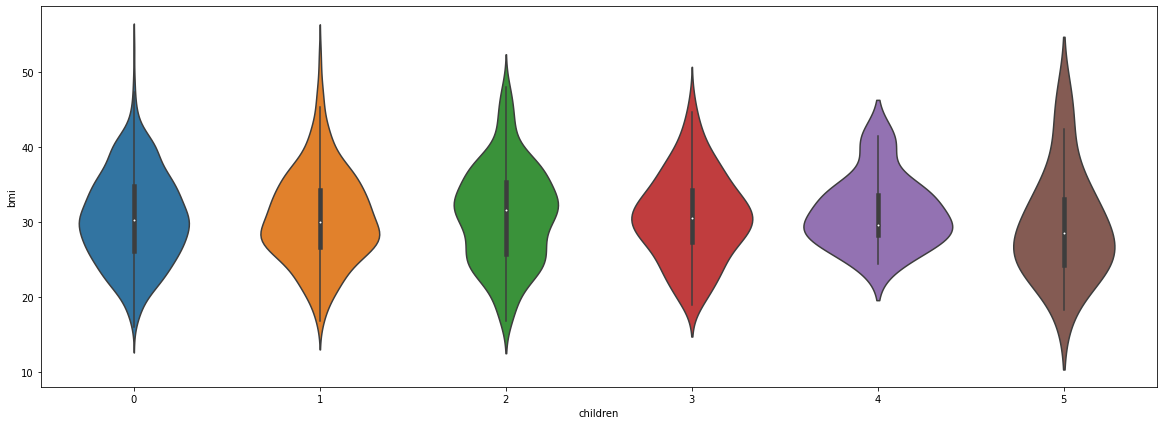

In [54]:
#Relationship between BMI and children
plt.figure(figsize=(20,7))
sns.violinplot(AxisInsurance_data["children"],AxisInsurance_data["bmi"]);

In [55]:
AxisInsurance_data.groupby(["children"])['bmi'].mean()

children
0    30.550227
1    30.623148
2    30.978104
3    30.684331
4    31.391200
5    29.605000
Name: bmi, dtype: float64

### Observations:
- The average BMI for customers with no kids, 1 kid,2 kids and 3 kids is comparable. 
- The average BMI for 4 kids is higher than customers with different count of kids.
- There are very few customers with 4 kids and 5 kids and the data seems to be right skewed.

## BMI vs Region

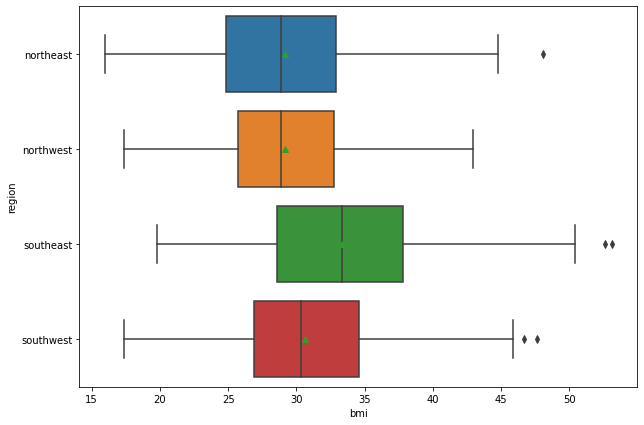

In [56]:
#Relationship between BMI and children
plt.figure(figsize=(10,7))
sns.boxplot(AxisInsurance_data["bmi"],AxisInsurance_data["region"],showmeans="true");

### Observations:
- The customers in the south east region have higher mean and median BMI values compared to other regions.

## BMI_group vs Region

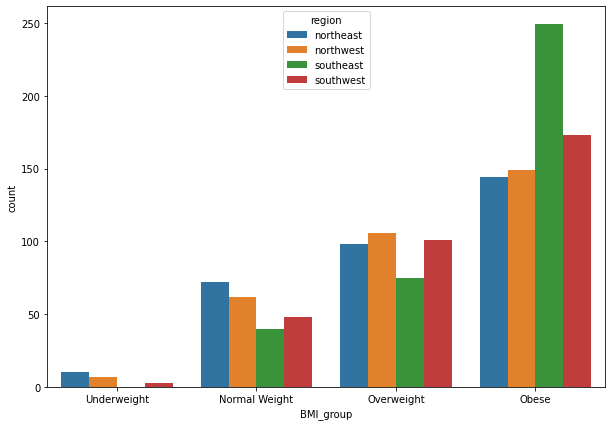

In [57]:
#Relationship between BMI and region
plt.figure(figsize=(10,7))
sns.countplot(AxisInsurance_data["BMI_group"],hue=AxisInsurance_data["region"]);

In [58]:
AxisInsurance_data.groupby(["region"])['bmi'].mean()

region
northeast    29.173503
northwest    29.195494
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64

### Observations:
- There are no customers with bmi value below the ideal range(underweight) in south east region, wheras in other regions, there are customers with below the ideal bmi range.
- The average bmi value of customers is higher for south east region, indicating that there are more obese customers from that region compared to others.
- In southeast region, majority of the customers are obese.

## Smoker vs Charges

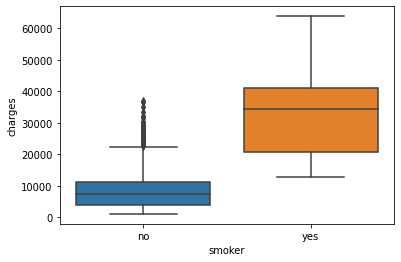

In [59]:
#Relationship between smoker and charges
sns.boxplot(AxisInsurance_data["smoker"],AxisInsurance_data["charges"]);

### Observations:
- The charges for customers who are smokers are very high compared to non smokers.
- The maximum value of charges for nonsmokers,excluding the outliers, is comparable to lower quantile charges value of smokers.

## Smoker vs BMI

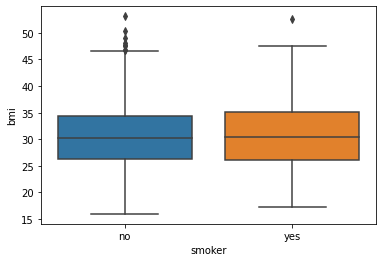

In [60]:
#Relationship between smoker and bmi
sns.boxplot(AxisInsurance_data["smoker"],AxisInsurance_data["bmi"]);

### Observations:
- There is not much significant difference between Smoker BMI vs NonSmoker BMI

## Age vs BMI_group

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '50'),
  Text(33, 0, '51'),
  Text(34, 0, '52'),
  Text(35, 0, '53'),
  Text(36, 0, '54'),
  Text(37, 0, '55')

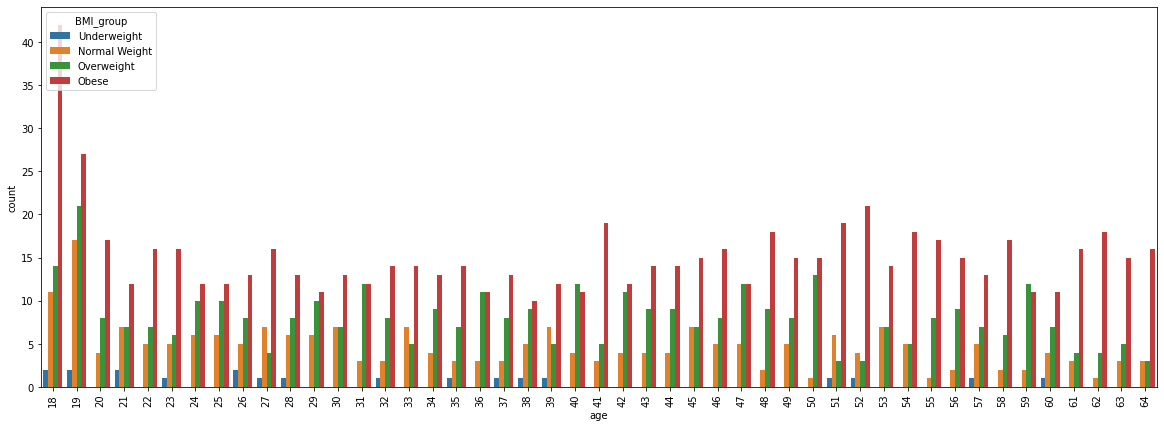

In [61]:
plt.figure(figsize=(20,7))
sns.countplot(AxisInsurance_data["age"],hue=AxisInsurance_data["BMI_group"]);
plt.xticks(rotation=90)

### Observations:
Majority of the customers who are 18years old are obese.

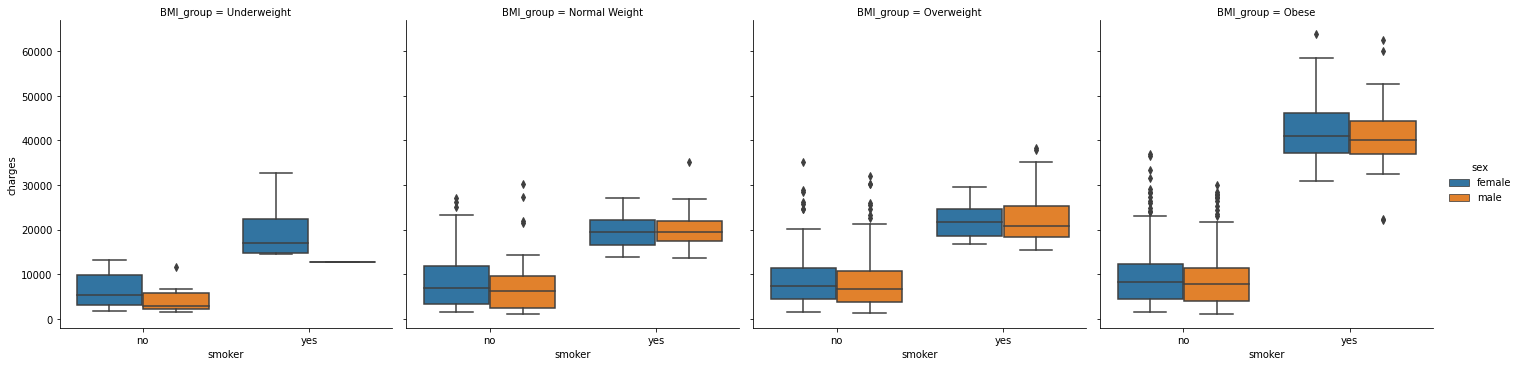

In [62]:
# Dispersion of charges with gender and BMI group
sns.catplot(x='smoker',y='charges',hue="sex",
             col='BMI_group', 
             data=AxisInsurance_data,
             col_wrap=4,
             kind="box");

In [63]:
AxisInsurance_data.groupby(["BMI_group","smoker","sex"])['charges'].mean()

BMI_group      smoker  sex   
Underweight    no      female     6366.336356
                       male       4580.599421
               yes     female    20304.917450
                       male      12829.455100
Normal Weight  no      female     8170.530034
                       male       7001.560899
               yes     female    19618.968270
                       male      20353.639569
Overweight     no      female     8523.889583
                       male       8153.611172
               yes     female    22197.310763
                       male      22508.836420
Obese          no      female     9142.453898
                       male       8490.404088
               yes     female    42105.933349
                       male      40932.960583
Name: charges, dtype: float64

### Observations:
- The charges for smokers are high compared to non smokers.
- The charges for the obese people are the highest.
- The charges for obese female smokers are the highest.

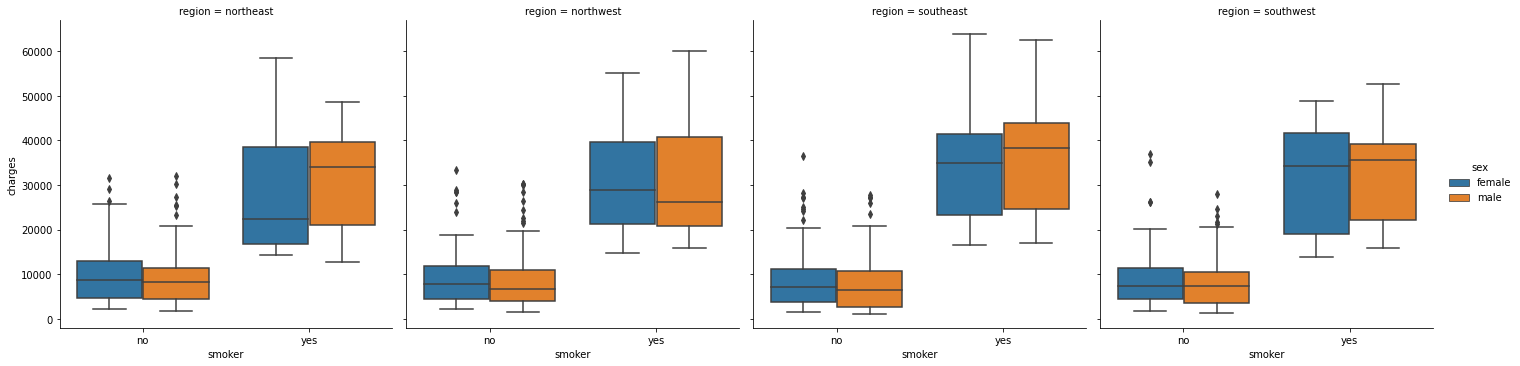

In [64]:
# Dispersion of charges with gender and BMI group
sns.catplot(x='smoker',y='charges',hue="sex",
             col='region', 
             data=AxisInsurance_data,
             col_wrap=4,
             kind="box");

In [65]:
AxisInsurance_data.groupby(["region","smoker","sex"])['charges'].mean()

region     smoker  sex   
northeast  no      female     9640.426984
                   male       8664.042222
           yes     female    28032.046398
                   male      30926.252583
northwest  no      female     8786.998679
                   male       8371.690284
           yes     female    29670.824946
                   male      30713.181419
southeast  no      female     8440.205552
                   male       7609.003587
           yes     female    33034.820716
                   male      36029.839367
southwest  no      female     8234.091260
                   male       7778.905534
           yes     female    31687.988430
                   male      32598.862854
Name: charges, dtype: float64

In [66]:
AxisInsurance_data.groupby(["smoker","BMI_group","sex"])['charges'].mean()

smoker  BMI_group      sex   
no      Underweight    female     6366.336356
                       male       4580.599421
        Normal Weight  female     8170.530034
                       male       7001.560899
        Overweight     female     8523.889583
                       male       8153.611172
        Obese          female     9142.453898
                       male       8490.404088
yes     Underweight    female    20304.917450
                       male      12829.455100
        Normal Weight  female    19618.968270
                       male      20353.639569
        Overweight     female    22197.310763
                       male      22508.836420
        Obese          female    42105.933349
                       male      40932.960583
Name: charges, dtype: float64

### Observations:
- The charges for southeast male smokers is higher than others.
- Of all the groups, female obese smokers has the highest charges.

<Figure size 1440x720 with 0 Axes>

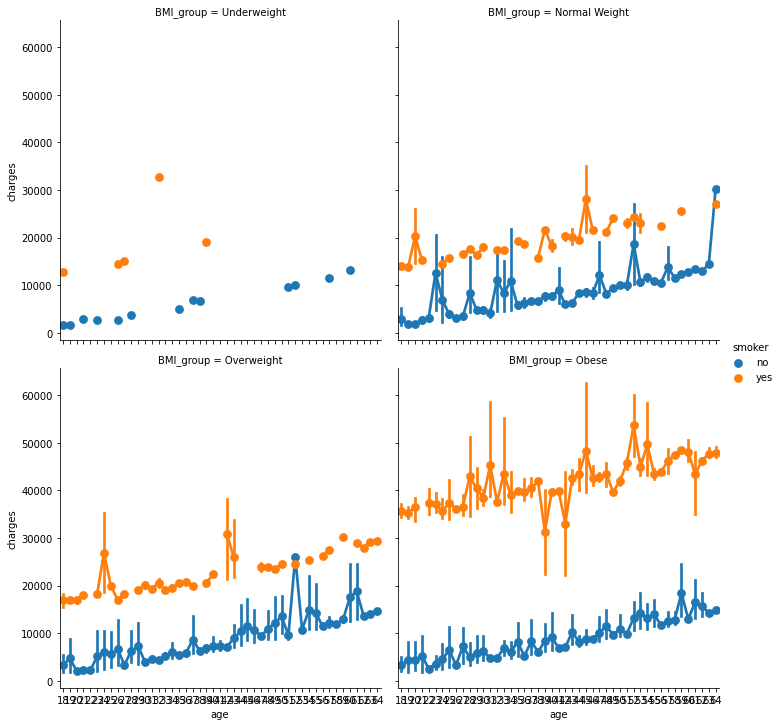

In [67]:
plt.figure(figsize=(20,10))
sns.catplot(x='age',y='charges',hue='smoker',
             col='BMI_group', 
             data=AxisInsurance_data,
             col_wrap=2,
             kind="point");
plt.show();

### Observations:
- The age variable has a positive correlation with charges.
- The charges are higher for obese BMI smokers.
- The charges increases as the age increases or bmi increases and if theyre smokers.

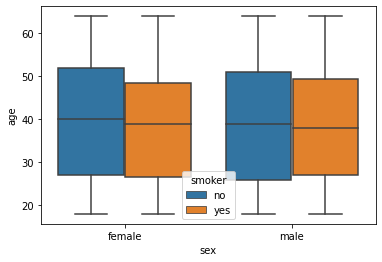

In [68]:
sns.boxplot(x='sex',y='age',hue='smoker',
             data=AxisInsurance_data);

### Observations:
There is not much significant difference in the mean age of male and female smokers.

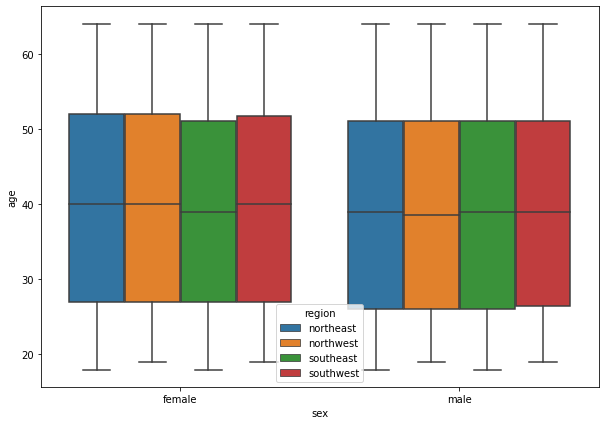

In [69]:
plt.figure(figsize=(10,7))
sns.boxplot(x='sex',y='age',hue='region',
             data=AxisInsurance_data);

### Observations:
There is not much significant difference in the average age of male and female customers across regions. We notice slightly lower value in the female age in south east region comapred to other regions.

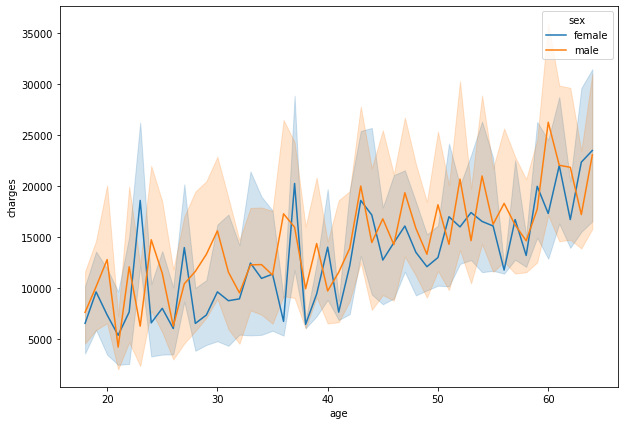

In [70]:
plt.figure(figsize=(10,7))
sns.lineplot(x='age',y='charges',hue='sex',
             data=AxisInsurance_data);

### Observations:
Irrespective of the gender, the insurance charges increases with age.

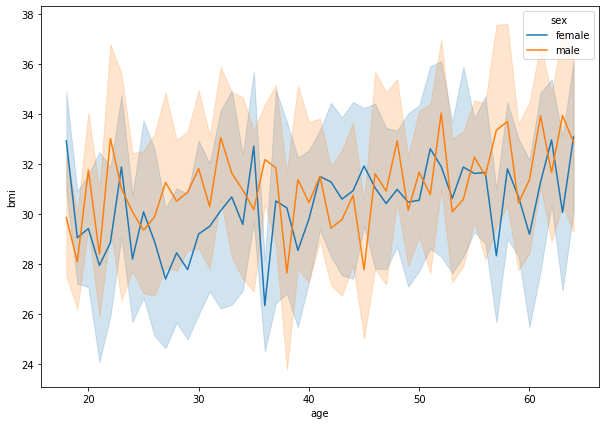

In [71]:
plt.figure(figsize=(10,7))
sns.lineplot(x='age',y='bmi',hue='sex',
             data=AxisInsurance_data);

### Observations:
The BMI value increases with age.

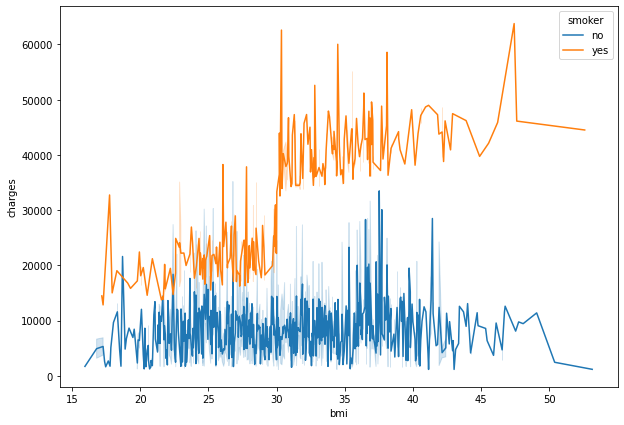

In [72]:
plt.figure(figsize=(10,7))
sns.lineplot(x='bmi',y='charges', hue='smoker',data=AxisInsurance_data);

### Observations:
- As we see, the charges for smokers with bmi>30 is higher than non smokers 

From above plots,we noticed that the charges are more for south east region customers compared to other regions.
Lets explore more about that region and findout why.

## Extract South east region data

In [73]:
AxisInsurance_southeast_region=AxisInsurance_data[AxisInsurance_data["region"]=="southeast"]
AxisInsurance_southeast_region

age     sex    bmi   BMI_group  children smoker     region     charges
1      18    male  33.77       Obese         1     no  southeast   1725.5523
2      28    male  33.00       Obese         3     no  southeast   4449.4620
5      31  female  25.74  Overweight         0     no  southeast   3756.6216
6      46  female  33.44       Obese         1     no  southeast   8240.5896
11     62  female  26.29  Overweight         0    yes  southeast  27808.7251
...   ...     ...    ...         ...       ...    ...        ...         ...
1322   62    male  38.83       Obese         0     no  southeast  12981.3457
1323   42  female  40.37       Obese         2    yes  southeast  43896.3763
1327   51    male  30.03       Obese         1     no  southeast   9377.9047
1330   57  female  25.74  Overweight         2     no  southeast  12629.1656
1335   18  female  36.85       Obese         0     no  southeast   1629.8335

[364 rows x 8 columns]

In [74]:
df_se =AxisInsurance_southeast_region.pivot_table(index = 'age',columns ='BMI_group',values ='charges')
df_se 

BMI_group  Normal Weight    Overweight         Obese
age                                                 
18           3705.111296   5965.664100   7310.048521
19                   NaN           NaN  35570.314200
20          26125.674770  17085.267600   6416.112608
21           2347.927500           NaN   4740.159662
22                   NaN   1992.477633  31284.246680
23                   NaN  10072.057000   9124.249200
24          25081.767840   2464.618800   9409.815000
25                   NaN   2137.653600  17904.198315
26                   NaN   7779.537700   3156.160025
27           7541.134800  18246.495500  23309.515260
28          17663.144200   4340.440900   8849.844217
29                   NaN   8640.770767   4008.613025
30                   NaN  19521.968200  16407.753103
31                   NaN   7803.837425   4429.565967
32          17626.239510   9418.487167   4357.103100
33           4185.097900   4779.602300  11608.877295
34                   NaN   8643.683975   4529.684300
35          19361.998800   4747.052900   5715.761175
36                   NaN   5821.772300  18480.626200
37                   NaN  19539.243000  22450.962326
38           6652.528800   5729.426000  14681.168100
39           8582.302300           NaN  10103.283056
40          18311.893900   6169.801800   6347.174400
41           6272.477200   6770.192500  11823.179550
42          12741.214500  17644.208223  19406.239600
43          18767.737700  14478.330150  32940.218028
44           8211.100200   8219.203900  20791.902102
45           9197.113700   8516.293850  29683.236153
46                   NaN   8069.282033  17920.748375
47                   NaN  17863.929633  31285.584533
48          21223.675800  15985.284250  13865.327600
49                   NaN   8601.329300   9452.411333
50          10107.220600  12964.897593   9218.774233
51          16036.623150           NaN  20049.861114
52          27117.993780  25330.120020  19688.062525
53          22220.304100   9487.644200  16973.265258
54          11013.711900           NaN  33103.535395
55                   NaN           NaN  17513.428731
56                   NaN           NaN  16967.849133
57          22192.437110  17239.100700  29829.009500
58          11833.782300           NaN  14154.996648
59                   NaN  13167.901375  25607.866840
60          12629.896700  12142.578600  30062.760150
61                   NaN  24513.091260  31669.796915
62                   NaN  27808.725100  15978.794066
63                   NaN           NaN  19645.384050
64          26982.214250           NaN  25852.548833

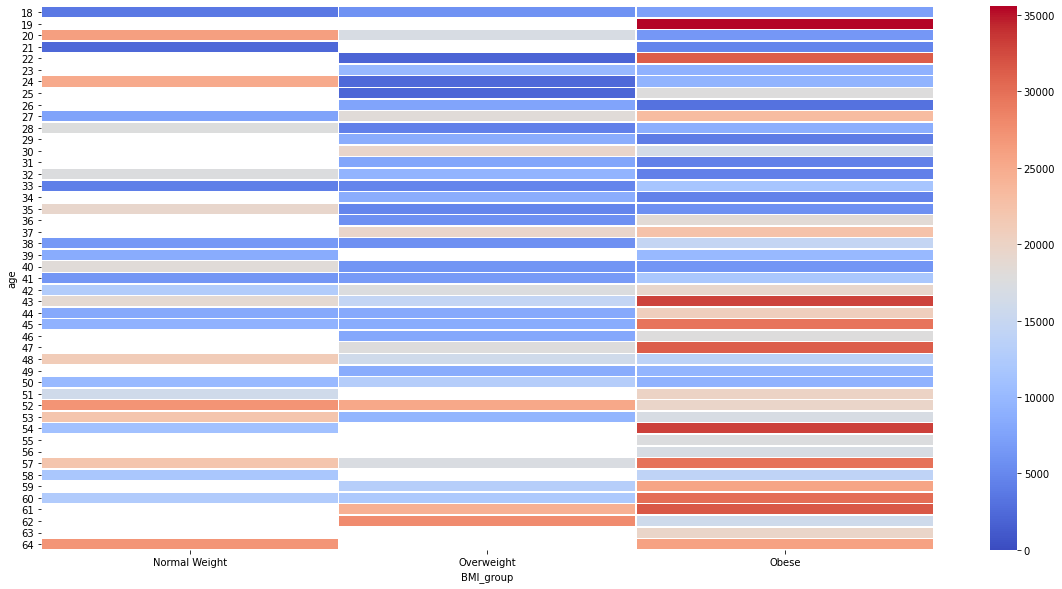

In [75]:
# Draw a heatmap 
plt.figure(figsize = (20,10)) # To resize the plot
sns.heatmap(df_se,  fmt="d", cmap='coolwarm', linewidths=.5, vmin=0);

### Observations:
- The charges for obese customers are more than other groups. 
- The 19yr old obese customers are paying the highest insurance charges.
- The charges increase with age and BMI. 
- We notice few customers who fall under Normal weight are also paying high insurance charges. 
- The charges for the normal weight older customers can be attributed to their age. As we have already seen, the charges increase with the age.
- we notice few young normal weight customers paying high charges. Lets dig deeper to findout why normal weight young customers are paying more by extracting normal weight customers data and observing their behaviors.

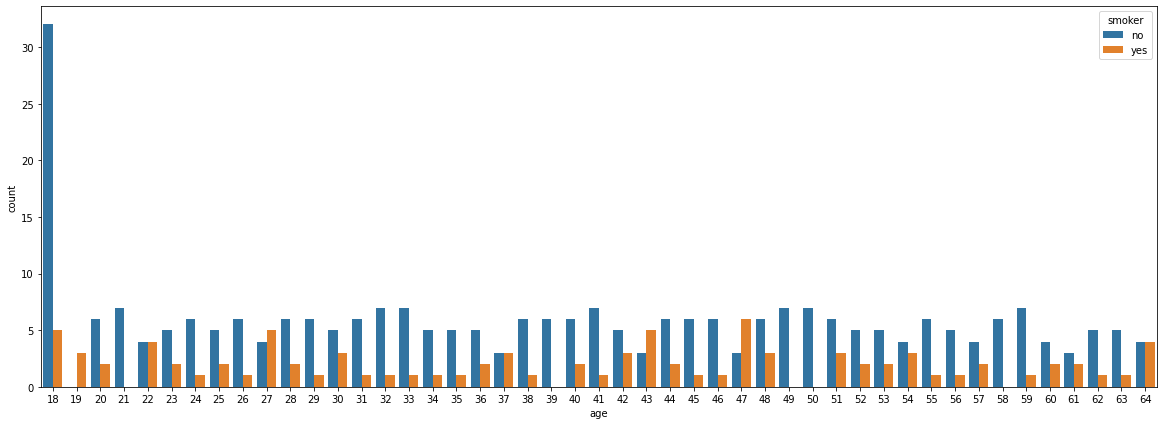

In [76]:
plt.figure(figsize=(20,7))
sns.countplot(AxisInsurance_southeast_region["age"],hue=AxisInsurance_southeast_region["smoker"]);

# Observations:
The 19yr olds from south east region are all smokers.

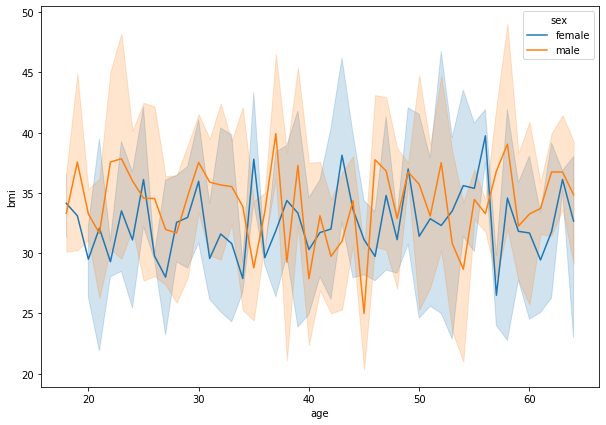

In [77]:
plt.figure(figsize=(10,7))
sns.lineplot(AxisInsurance_southeast_region["age"],AxisInsurance_southeast_region["bmi"],hue=AxisInsurance_southeast_region["sex"]);

# Observations:

- From the above 2 graphs, we conclude that the 19yr old customers are paying the highest because of their smoking behavior and higher BMI values.

## Lets extract Normal weight BMI group customers data from South east region

In [78]:
# Extract Normal weight BMI group data from south east region dataframe
AxisInsurance_southeast_NE=AxisInsurance_southeast_region[AxisInsurance_southeast_region["BMI_group"]=="Normal Weight"]

In [79]:
df_SE_NW =AxisInsurance_southeast_NE.pivot_table(index = 'age',columns ='smoker',values ='charges')

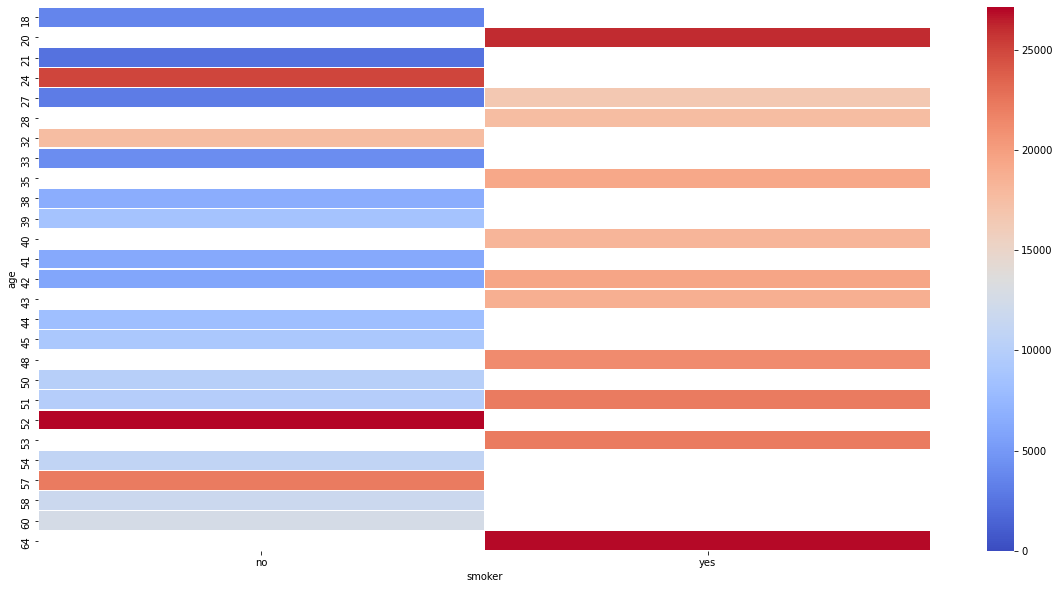

In [80]:
# Draw a heatmap 
plt.figure(figsize = (20,10)) # To resize the plot
sns.heatmap(df_SE_NW,  fmt="d", cmap='coolwarm', linewidths=.5, vmin=0);

### Observations:
We understand from this heatmap that the charges  for smokers are more even if they are maintaining Normal weight.

In [81]:
AxisInsurance_18=AxisInsurance_data[AxisInsurance_data["age"]==18]
AxisInsurance_18

age     sex     bmi   BMI_group  children smoker     region      charges
1      18    male  33.770       Obese         1     no  southeast   1725.55230
22     18    male  34.100       Obese         0     no  southeast   1137.01100
31     18  female  26.315  Overweight         0     no  northeast   2198.18985
46     18  female  38.665       Obese         2     no  northeast   3393.35635
50     18  female  35.625       Obese         0     no  northeast   2211.13075
...   ...     ...     ...         ...       ...    ...        ...          ...
1296   18    male  26.125  Overweight         0     no  northeast   1708.92575
1315   18    male  28.310  Overweight         1     no  northeast  11272.33139
1317   18    male  53.130       Obese         0     no  southeast   1163.46270
1334   18  female  31.920       Obese         0     no  northeast   2205.98080
1335   18  female  36.850       Obese         0     no  southeast   1629.83350

[69 rows x 8 columns]

In [82]:
df_18 =AxisInsurance_18.pivot_table(index = 'bmi',columns ='region',values ='charges')
df_18

region    northeast   southeast
bmi                            
15.960   1694.79640         NaN
17.290  12829.45510         NaN
20.790          NaN   1607.5101
21.470   1702.45530         NaN
21.565  13747.87235         NaN
...             ...         ...
40.280   2217.60120         NaN
41.140          NaN   1146.7966
42.240          NaN  38792.6856
43.010          NaN   1149.3959
53.130          NaN   1163.4627

[63 rows x 2 columns]

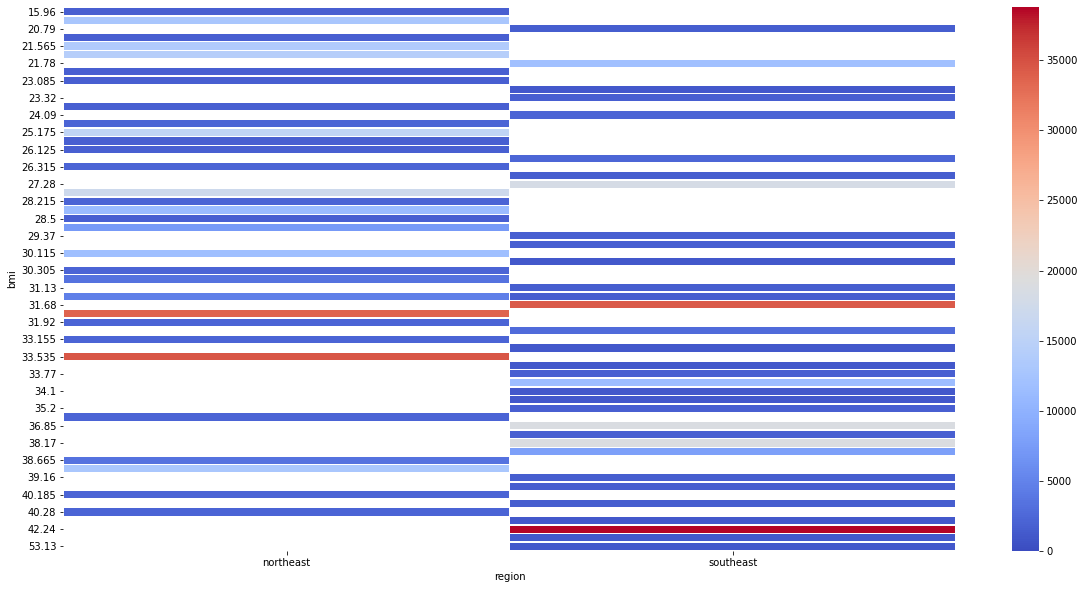

In [83]:
# Draw a heatmap 
plt.figure(figsize = (20,10)) # To resize the plot
sns.heatmap(df_18,  fmt="d", cmap='coolwarm', linewidths=.5, vmin=0);

### Observations:
The charges are more for obese customers.
There are few customers in Southeast region whose bmi values are >50, which is considered to be extremely higher.

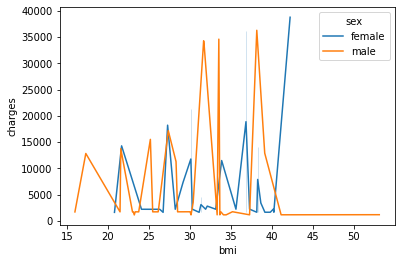

In [84]:
sns.lineplot(AxisInsurance_18["bmi"],AxisInsurance_18["charges"],hue=AxisInsurance_18["sex"]);

### Observations:
- The charges increase as bmi increases.
- The male charges are more compared to female charges.

In [85]:
# Extracting 19yr old data
AxisInsurance_19=AxisInsurance_data[AxisInsurance_data["age"]==19]
AxisInsurance_19

age     sex     bmi      BMI_group  children smoker     region  \
0      19  female  27.900     Overweight         0    yes  southwest   
15     19    male  24.600  Normal Weight         1     no  southwest   
32     19  female  28.600     Overweight         5     no  southwest   
35     19    male  20.425  Normal Weight         0     no  northwest   
65     19  female  28.900     Overweight         0     no  southwest   
...   ...     ...     ...            ...       ...    ...        ...   
1251   19    male  19.800  Normal Weight         0     no  southwest   
1291   19    male  34.900          Obese         0    yes  southwest   
1299   19  female  25.745     Overweight         1     no  northwest   
1313   19  female  34.700          Obese         2    yes  southwest   
1316   19  female  20.600  Normal Weight         0     no  southwest   

          charges  
0     16884.92400  
15     1837.23700  
32     4687.79700  
35     1625.43375  
65     1743.21400  
...           ...  
1251   1241.56500  
1291  34828.65400  
1299   2710.82855  
1313  36397.57600  
1316   1731.67700  

[67 rows x 8 columns]

In [86]:
df_19 =AxisInsurance_19.pivot_table(index = 'bmi',columns ='region',values ='charges')
df_19

region    northwest   southeast  southwest
bmi                                       
17.480   1621.34020         NaN        NaN
17.800          NaN         NaN   1727.785
18.600          NaN         NaN   1728.897
19.800          NaN         NaN   1241.565
20.300          NaN         NaN   1242.260
...             ...         ...        ...
36.955  36219.40545         NaN        NaN
37.430   2138.07070         NaN        NaN
39.615   2730.10785         NaN        NaN
40.500          NaN         NaN   1759.338
44.880          NaN  39722.7462        NaN

[64 rows x 3 columns]

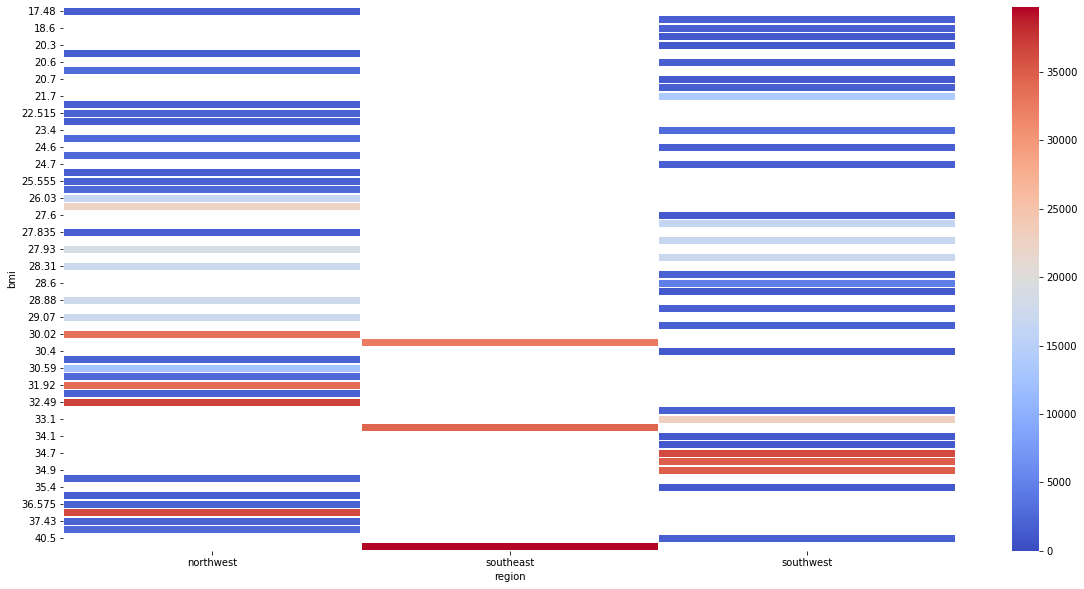

In [87]:
# Draw a heatmap 
plt.figure(figsize = (20,10)) # To resize the plot
sns.heatmap(df_19,  fmt="d", cmap='coolwarm', linewidths=.5, vmin=0);

### Observations:
The charges are more for obese customers.
As BMI increases, charges will increase.

## Conclusions:

Below is the analysis based on different variables/customer characteristics.

### Smoker
- The customers' age varies from 18-64 years.
- There are more 18yr and 19yr old customers and majority of them are nonsmokers.
- There are considerably higher nonsmokers (79.5%) than smokers (20.5%).
- There are more smokers in the ages 19yrs, 18yrs, and 43yrs compared to other ages.
- There are highest number of smokers at 19yrs compared to other ages.
- The ratio of smokers to non smokers is highest for 43yrs old, followed by 37 and 47yrs.
- There are more male smokers compared to female smokers. 
- The charges for customers who are smokers are very high compared to non smokers.

### BMI:
- Majority of customers are obese. Obesity is most prevelant among the 18 yrs and 19yrs customers. 
- There are only 18.1% of the customers who fall under the ideal bmi range (underweight and normal weight),indicating that over 80% of them  are either overweight or obese.
- There are very few customers who are underweight and among them, there are slightly more underweight female customers than male customers.
- There is not much statistically significant difference between Smoker BMI vs NonSmoker BMI
- There are no customers with bmi value below the ideal range(underweight) in south east region.
- The average bmi value of customers is higher for south east region, indicating that there are more obese customers from that region.
- In southeast region, majority of the customers are obese.
- The charges seems to increase with bmi.
- Customers with BMI > 30 have the highest insurance rates.
- The mean charges for obese female smokers are the highest.

## Charges
- The charges for male customers are higher than those for female customers.  
- The charges increase with age,bmi and smoking.
- Customers with BMI > 30 have the highest insurance rates.
- The first quantile and the median value of customer charges is same for both male and female.
- The upper or third quantile of male customer charges is very high compared to female customer charges(infact double).
- The charges for customers who are smokers are very high compared to non smokers.
- The maximum value of charges for nonsmokers,excluding the outliers, is comparable to lower quantile charges value of smokers.
- Irrespective of the region, the mean charges for obese female smokers are the highest.
- The mean charges for southeast male smokers is higher than others.

### Region
- There are 4 different regions and there are more customers from south east region. The percentage of customers in other regions are comparable.
- All the 18yr old customers are from either north east or south east regions only.
- The majority of the 19yr old customers are from north west and south west regions.
- There are more smokers from south east region, followed by north east region and the rest.
- The average bmi value of customers is higher for south east region, indicating that there are more overweight and obese customers from that region.
- The mean charges for southeast male smokers is higher than other regions, which might indicate that these male smokers are either overweight or obese (the charges for people with higher BMI are higher)

## Children
- There are more customers with no children, followed by customers with 1 kid , 2 kids, 3 kids ,4 kids and 5 kids.
- There are very few customers with 4 kids(1.9%) and 5 kids(1.3%).
- There is not much statistically significant difference in the BMI values of customers with 1 kid,2 kid,3 kids or no kids.




### Recommendations:
- The rates are high for customers who smoke and are overweight. So, Axis insurance should follow the following measures to reduce claims.

    1.Encourage customers to adopt a healthy lifestyle by explaining the importance of being healthy.
    
    2.Understand the underlying behavioral health conditions that lead to obesity and other health conditions.
    
    3.Set up a helpline to help customers wean off smoking.
    

- The Obesity in South east region is the highest especially among teenagers. This might be due to their sedentary lifestyle.

    Axis insurance should come up with creative ways to encourage the customers to participate in physical activities.
    For example, Axis insurance can make use of apps and wearable technologies to track the physical activity and incentivise the participants by lowering the rates. 
    

- In regions where customers cannot afford the gym membership, axis should team up with the loxal governments to subsidize gym membership. Alternatively, Axis can provide the customers access to at home workouts.

### 1. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint- Formulate a hypothesis and prove/disprove it]

In [88]:

Smoker_charges=AxisInsurance_data[AxisInsurance_data['smoker'] == 'yes'].charges.sum()

In [89]:
NonSmoker_count=AxisInsurance_data[AxisInsurance_data['smoker'] == 'no'].charges.count()
NonSmoker_charges=AxisInsurance_data[AxisInsurance_data['smoker'] == 'no'].charges.sum()
NonSmoker_count

1063

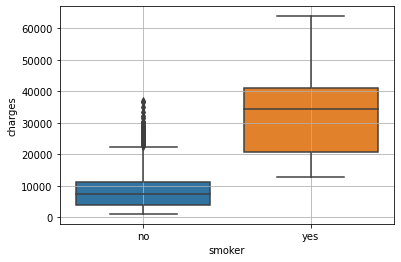

In [90]:
sns.boxplot(x="smoker", y="charges", data=AxisInsurance_data)
plt.grid()
plt.show()

### Observations:
- From the above plot, it is evident that smokers pay more than Nonsmokers.
- A hypothesis test needs to be performed to check if the difference in charges is statistically significant. 
- We will perform a "t-test" as we are comparing the means of categorical variables. 
    

### Step 1: Define null and alternate hypotheses

- H0: There is no difference in the medical claims made by the smokers and non-smokers.

- H1: The medical claims made by smokers is greater than the claims by non-smokers. 

* H<sub>0</sub>: x&#772;<sub>1</sub> = x&#772;<sub>2</sub>, or x&#772;<sub>2</sub> - x&#772;<sub>1</sub> = 0
* H<sub>A</sub>: x&#772;<sub>2</sub> < x&#772;<sub>1</sub>, or x&#772;<sub>2</sub> - x&#772;<sub>1</sub> < 0

## Step 2: Decide the significance level
α= 0.05

## Step 3: Identify the test
We use a one tail two-sample t - test

## Step 4: Calculate the test-statistics and p-value

In [91]:
smoker=AxisInsurance_data[AxisInsurance_data['smoker'] == 'yes']['charges']
Nonsmoker=AxisInsurance_data[AxisInsurance_data['smoker'] == 'no']['charges']
t,p_value_claims = stats.ttest_ind(smoker, Nonsmoker)
p_value_claims=p_value_claims/2
print("tstats = ",t, ", p_value = ", p_value_claims)

tstats =  46.64479459840305 , p_value =  7.033610474688249e-283


In [92]:
if p_value_claims < 0.05:
    print(f'With a p-value of {round(p_value_claims,4)} the difference is significant. Therefore, We reject the null hypothesis')
else:
    print(f'With a p-value of {round(p_value_claims,4)} the difference is not significant. Therefore, We fail to reject the null|')


With a p-value of 0.0 the difference is significant. Therefore, We reject the null hypothesis


# Conclusion:
### As P-value < 0.05 (alpha), the difference in means between charges of smokers and non-smokers is statistically significant. Therefore, we reject the null hypothesis and conclude that the medical claims made by people who smoke is greater than people who don't smoke. This result validates the disparity in the mean values of the charges for smokers and non smokers shown in the plot.

## 2.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.


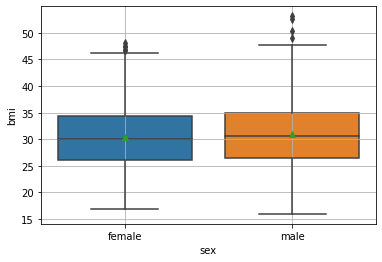

In [93]:
sns.boxplot(x="sex", y="bmi", data=AxisInsurance_data,showmeans="true")
plt.grid()
plt.show()

In [94]:
AxisInsurance_data.groupby(["sex"])['bmi'].std()

sex
female    6.046023
male      6.144973
Name: bmi, dtype: float64

### Observations:
- We notice very slight difference in the median BMI value of men and women with some outliers.
- The mean BMI values are almost identical.
- Is this difference significant enough?
  Lets findout.

### Step 1: Define null and alternate hypotheses

- H0: There is no difference in the BMI value of males and females.

- H1: The BMI value of females is different than males.
    
* H<sub>0</sub>: x&#772;<sub>1</sub> = x&#772;<sub>2</sub>, There is no difference between the means
* H<sub>A</sub>: x&#772;<sub>1</sub> != x&#772;<sub>2</sub>, There is difference between the means

## Step 2: Decide the significance level
α= 0.05

## Step 3: Identify the test
This is a two-sample t - test

## Step 4: Calculate the test-statistics and p-value

In [95]:
Male_bmi=AxisInsurance_data[AxisInsurance_data['sex'] == 'male']["bmi"]

In [96]:
Female_bmi=AxisInsurance_data[AxisInsurance_data['sex'] == 'female']["bmi"]

In [97]:
t,p_value_bmi = stats.ttest_ind(Male_bmi, Female_bmi)
print("tstats = ",t, ", p_value = ", p_value_bmi)

tstats =  1.6970672301298684 , p_value =  0.08991704324931137


## Step 5:  Decide to reject or accept null hypothesis

In [98]:
if p_value_bmi < 0.05:
    print(f'With a p-value of {round(p_value_bmi,4)} the difference is statistically significant. Therefore, we reject the null hypothesis')
else:
    print(f'With a p-value of {round(p_value_bmi,4)} the difference is not statistically significant. Therefore, we fail to reject the null|')


With a p-value of 0.0899 the difference is not statistically significant. Therefore, we fail to reject the null|


# Conclusion:
### The P-value > 0.05 (alpha) indicates that the difference in means is not statistically significant. We  fail to reject the null hypothesis as there is no difference in the mean BMI values of male and female.This result validates that mean values are similar as shown in the plot.The variance values are also similar for both.


# 3.Is the proportion of smokers significantly different across different regions? [Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency()]


## Step 1: Define null and alternate hypotheses
H0: Proportion of smokers are not significantly different across different regions

H1: Proportion of smokers are significantly different across different regions
* H<sub>0</sub>: p&#772;<sub>1</sub> = p&#772;<sub>2</sub>=p&#772;<sub>3</sub>=p&#772;<sub>4</sub>, There is no difference in the proportions of smokers across regions.
* H<sub>A</sub>: p&#772;<sub>1</sub> != p&#772;<sub>2</sub>!= p&#772;<sub>3</sub>!= p&#772;<sub>4</sub>, There is difference between the means

## Step 2: Decide the significance level
Here we select α= 0.05 as per 95% Confidence Level requirement in the question.
    
## Step 3: Identify the test statistic
This is a Chi-sq Test where categorical data has been reported.
    
## Step 4: Calculate the p - value and test statistic

In [99]:
smoker_reg=AxisInsurance_data[AxisInsurance_data['smoker'] == 'yes']
smoker_reg.region.value_counts()

southeast    91
northeast    67
southwest    58
northwest    58
Name: region, dtype: int64

In [100]:
smoker_region_df=pd.crosstab(AxisInsurance_data['smoker'],AxisInsurance_data['region'])
smoker_region_df

region  northeast  northwest  southeast  southwest
smoker                                            
no            257        266        273        267
yes            67         58         91         58

In [101]:
chi2, pval, dof, exp_freq = chi2_contingency(smoker_region_df, correction = False)
pval

0.06354826573182332

# or

In [102]:
observed_values=smoker_region_df.values
val=chi2_contingency(smoker_region_df)
expected_values=val[3]
no_of_rows=len(smoker_region_df.iloc[0:2,0])
no_of_cols=len(smoker_region_df.iloc[0,0:4])
ddof=(no_of_rows-1)*(no_of_cols-1)
alpha=0.05

chi_square=sum([(o-e)**2/e for o,e in zip(observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]+chi_square[2]+chi_square[3]
from scipy.stats import chi2
critical_value=chi2.ppf(q=1-alpha,df=ddof)
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
p_value

0.06354826573182337

## Step 5:  Decide to reject or fail to reject null hypothesis

In [103]:
if p_value < 0.05:
    print(f'With a p-value of {round(p_value,4)} ,the difference is statistically significant. Therefore, we reject the null hypothesis')
else:
    print(f'With a p-value of {round(p_value,4)} ,the difference is not statistically significant. Therefore, we fail to reject the null hypothesis')


With a p-value of 0.0635 ,the difference is not statistically significant. Therefore, we fail to reject the null hypothesis


### P> 0.05 indicating that there is no statistical difference in the proportion of smokers across regions.  We, therefore, fail to reject the null hypothesis.

# 4.Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence. *Consider a significance level of 0.05 for all tests.

In [104]:
bmi_women=AxisInsurance_data[(AxisInsurance_data['sex'] == 'female')& (AxisInsurance_data['children']<=2)]
bmi_women.children.value_counts()

0    289
1    158
2    119
Name: children, dtype: int64

In [105]:
bmi_women

age     sex    bmi   BMI_group  children smoker     region      charges
0      19  female  27.90  Overweight         0    yes  southwest  16884.92400
5      31  female  25.74  Overweight         0     no  southeast   3756.62160
6      46  female  33.44       Obese         1     no  southeast   8240.58960
9      60  female  25.84  Overweight         0     no  northwest  28923.13692
11     62  female  26.29  Overweight         0    yes  southeast  27808.72510
...   ...     ...    ...         ...       ...    ...        ...          ...
1331   23  female  33.40       Obese         0     no  southwest  10795.93733
1334   18  female  31.92       Obese         0     no  northeast   2205.98080
1335   18  female  36.85       Obese         0     no  southeast   1629.83350
1336   21  female  25.80  Overweight         0     no  southwest   2007.94500
1337   61  female  29.07  Overweight         0    yes  northwest  29141.36030

[566 rows x 8 columns]

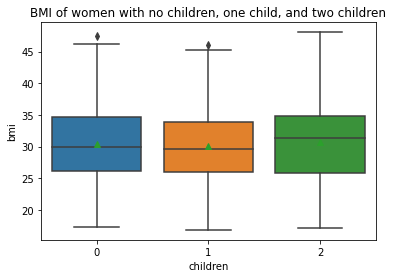

In [106]:
sns.boxplot(bmi_women['children'], bmi_women['bmi'],showmeans="true");
plt.title('BMI of women with no children, one child, and two children')
plt.show()

In [107]:
AxisInsurance_data.groupby(["children"])['bmi'].std()

children
0    6.044383
1    6.101435
2    6.509644
3    5.787173
4    4.627211
5    7.139686
Name: bmi, dtype: float64

### Observations: 
From the above plot,the average bmi value of customers with 1,kid,2 kids and no kids seems to be comparable.

### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the the mean BMI of women with no children, one child, and two children respectively.

### Step 2: Decide the significance level
Here we select α = 0.05

### Step 3: Identify the test statistic
Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate p value using ANOVA table
* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [108]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('children ~ bmi', data = bmi_women).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
print(aov_table['PR(>F)'][0])
p_women_bmi_children=aov_table['PR(>F)'][0]
p_women_bmi_children

              sum_sq     df         F   PR(>F)
bmi         0.043290    1.0  0.068411  0.79376
Residual  356.896639  564.0       NaN      NaN
0.7937600294539013


0.7937600294539013

### Step 5:  Decide to reject or accept null hypothesis

In [109]:
if p_women_bmi_children < 0.05:
    print(f'With a p-value of {round(p_women_bmi_children,4)} the difference is significant. Therefore, We reject the null hypothesis')
else:
    print(f'With a p-value of {round(p_women_bmi_children,4)} the difference is not significant. Therefore, We fail to reject the null|')


With a p-value of 0.7938 the difference is not significant. Therefore, We fail to reject the null|


# Conclusion:
### p value is 0.7938 and it is greater than our chosen level of signifance at 5%.Now that we have  sufficient evidence, we fail to reject the null hypothesis that mean BMI of women with no children, one child, and two children are same.

### From the plot, the mean bmi value of customers with 2 kids,1 kid and zero kids seems to be comparable.The results of the hypothesis test proves the same.


A data analyst or statistician must not entirely reply on the graphs for conclusions. He or she should always perform a hypothesis test to check for statistical significance.




# Data profiling using Pandas Profiling to look at the EDA


In [110]:
from pandas_profiling import ProfileReport

profile = ProfileReport(AxisInsurance_data)
# to view report created by pandas profile
profile

In [111]:
# to save report obtained via pandas profiling
profile.to_file('/Users/srujana/Downloads/Axis_output.html')